# Life Expectency Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Life Expectancy Data.csv')

In [3]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

## Data Overview

In [4]:
data.columns = data.columns.str.strip()

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.sample(3)

Country  Year      Status  Life expectancy  Adult Mortality  \
2002          Paraguay  2004  Developing             71.9            165.0   
994            Germany  2015   Developed             81.0             68.0   
1650  Marshall Islands  2013  Developing              NaN              NaN   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
2002              3     6.20               20.600830          9.0        0   
994               2      NaN                0.000000         88.0     2464   
1650              0     0.01              871.878317          8.0        0   

       BMI  under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
2002  42.0                  4   92.0               5.78        92.0       0.2   
994   62.3                  3   94.0                NaN        95.0       0.1   
1650  81.6                  0   79.0              17.24        79.0       0.1   

               GDP  Population  thinness  1-19 years  thinness 5-9 years  \
2002    148.527976     57374.0                   2.3                 2.2   
994   41176.881580  81686611.0                   1.1                 1.1   
1650   3617.752354         NaN                   0.1                 0.1   

      Income composition of resources  Schooling  
2002                            0.639       12.1  
994                             0.924       17.1  
1650                              NaN        0.0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

- Most of the Columns are Numerical. 
- Only two columns are Categorical.
- Some of the columns contain Null Values.
- No issues of Incorrect Datatype.

In [8]:
print(f"\nThe Dataset Contains {data.shape[0]} rows and {data.shape[1]} columns\n")


The Dataset Contains 2938 rows and 22 columns



In [9]:
print("\nDataset has Null Values: ",data.isnull().sum().any(),"\n")


Dataset has Null Values:  True 



In [10]:
print("\nDataset has Duplicated Values: ",data.duplicated().sum().any(),"\n")


Dataset has Duplicated Values:  False 



In [11]:
data.describe()

Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  1-19 years  thinness 5-9 years  \
count           2904.000000         2904.000000   
mean               4.839704            4.870317   
std                4.420195            4.508882   
min                0.100000            0.100000   
25%                1.600000            1.500000   
50%                3.300000            3.300000   
75%                7.200000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

- **Life Expectancy** does contain Outliers as 75% of the Moratality is under 228 and Max value is 723
- Similarly in **Infanct Deaths** column. 75% of the deaths are under 22 and the max is 1800. A clear cut presence of outliers.
- **Alcohal** and **Percentage Expenditure** columns have outliers as well.
- **Hepatitese B** has outliers on the lower side...
- **Measles**, **Under-five deaths**, **Total Expenditure**, **GDP**, **thinness 1-19 years**, **thinness 5-9 years** have outliers...
- Columns **HIV/AIDS** has a clear cut outlier as 75% of the data is below 0.800 and the Max value is 50.66

## Exploratory Data Analysis

**Handling Null Values**

Making the temporary dataset to avoid dataleakage and perform different EDA to get the insights of what will work better for different preprocessing techiniques.

In [12]:
cleaned_data_temp = data.copy()

In [13]:
cleaned_data_temp.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [14]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)

# Select multiple numeric features that are correlated
cols_to_impute =   ['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI',
       'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling']# just an example

# Fit and transform
imputed = knn.fit_transform(cleaned_data_temp[cols_to_impute])

# Put the imputed values back
cleaned_data_temp_knn = cleaned_data_temp.copy()
cleaned_data_temp_knn[cols_to_impute] = imputed

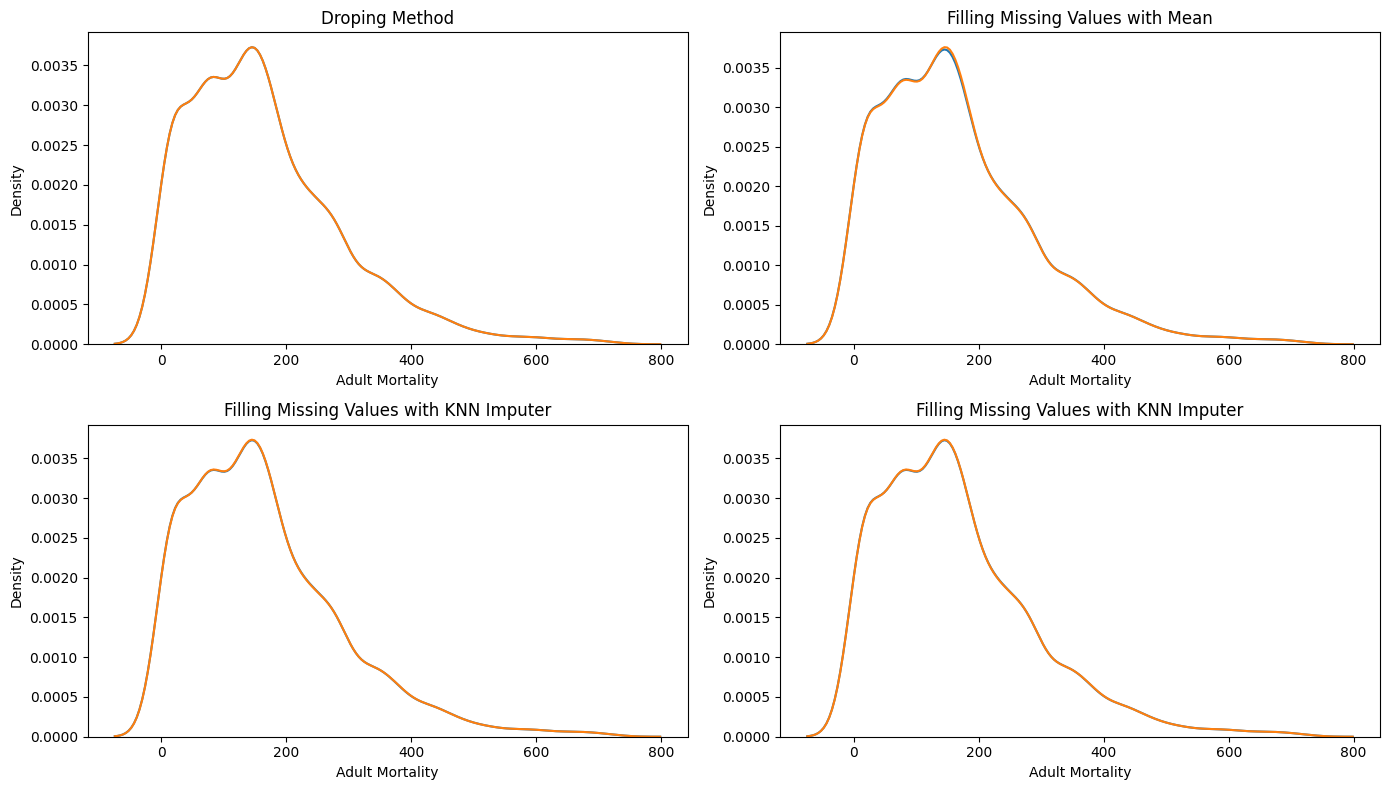

In [15]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.kdeplot(cleaned_data_temp['Adult Mortality'])
sns.kdeplot(cleaned_data_temp.dropna(subset='Adult Mortality')['Adult Mortality'])
plt.title("Droping Method")

plt.subplot(2,2,2)
sns.kdeplot(cleaned_data_temp['Adult Mortality'])
sns.kdeplot(cleaned_data_temp.fillna(cleaned_data_temp['Adult Mortality'].mean())['Adult Mortality'])
plt.title("Filling Missing Values with Mean")

plt.subplot(2,2,3)
sns.kdeplot(cleaned_data_temp['Adult Mortality'])
sns.kdeplot(cleaned_data_temp_knn['Adult Mortality'])
plt.title("Filling Missing Values with KNN Imputer")


plt.subplot(2,2,4)
sns.kdeplot(cleaned_data_temp['Adult Mortality'])
sns.kdeplot(cleaned_data_temp_knn['Adult Mortality'])
plt.title("Filling Missing Values with KNN Imputer")

plt.tight_layout()

- Droping the Missing values has no affect on the distribution but we will loss the information in that case.
- Filling with Mean has a very small change in Data Distribution.. 
- KNN Imputer has the best results in this case. ✔️

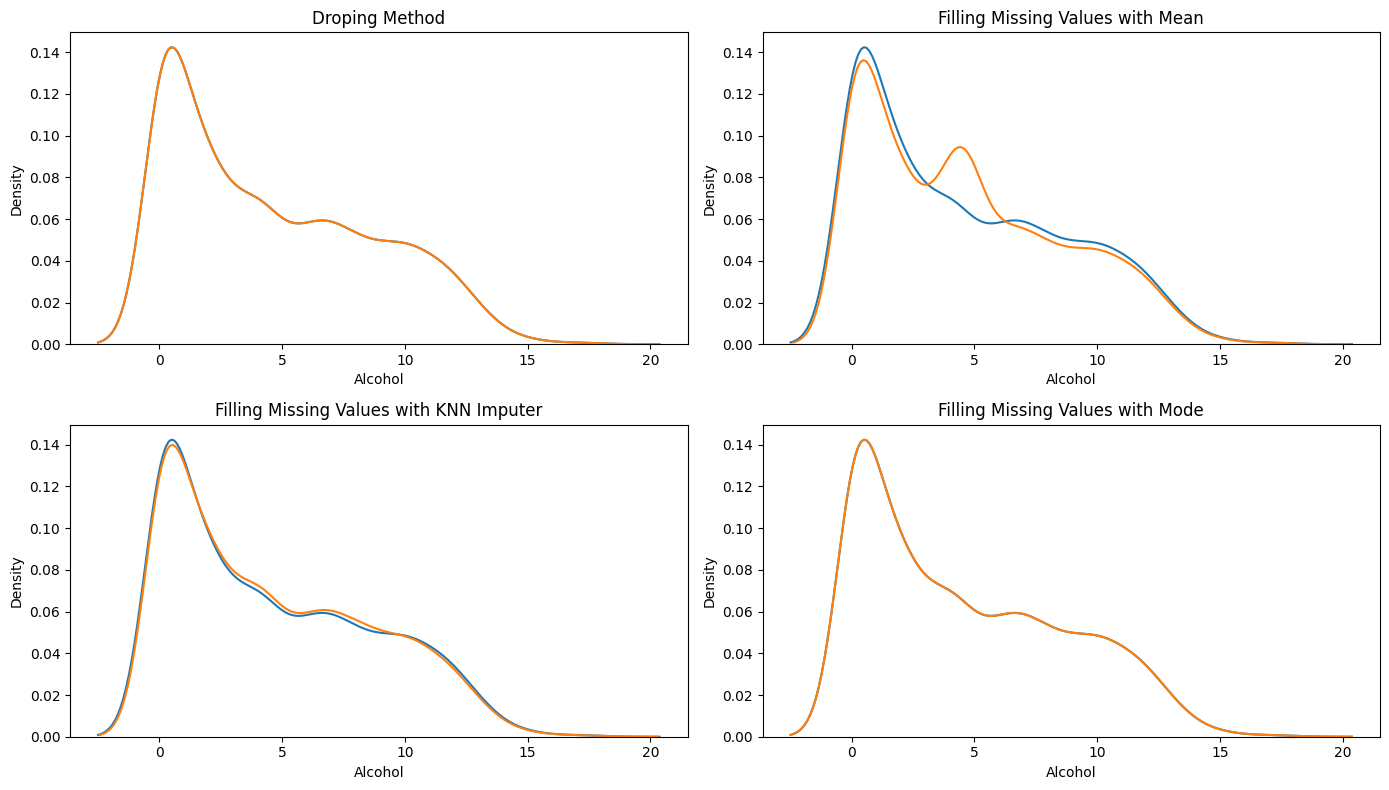

In [16]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.kdeplot(cleaned_data_temp['Alcohol'])
sns.kdeplot(cleaned_data_temp.dropna(subset='Alcohol')['Alcohol'])
plt.title("Droping Method")

plt.subplot(2,2,2)
sns.kdeplot(cleaned_data_temp['Alcohol'])
sns.kdeplot(cleaned_data_temp.fillna(cleaned_data_temp['Alcohol'].mean())['Alcohol'])
plt.title("Filling Missing Values with Mean")

plt.subplot(2,2,3)
sns.kdeplot(cleaned_data_temp['Alcohol'])
sns.kdeplot(cleaned_data_temp_knn['Alcohol'])
plt.title("Filling Missing Values with KNN Imputer")

plt.subplot(2,2,4)
sns.kdeplot(cleaned_data_temp['Alcohol'])
sns.kdeplot(cleaned_data_temp.fillna(cleaned_data_temp['Alcohol'].mode())['Alcohol'])
plt.title("Filling Missing Values with Mode")

plt.tight_layout()

In Case of Missing Value Imputation of Alcohol Column, We can see that the Dropping the Null values and replacing Null values with Mode keeps the distribution intact.

So, filling Null values with Mode will be the better choice as we will not lose the import information as well. 


KNN OR MODE !!!✔️

In [17]:
#  Creating the Function to check the affect of different imputation techniques...

def impute_effect(col):
    plt.figure(figsize=(14,8))

    plt.subplot(2,2,1)
    sns.kdeplot(cleaned_data_temp[col])
    sns.kdeplot(cleaned_data_temp.dropna(subset=col)[col])
    plt.title("Droping Method")

    plt.subplot(2,2,2)
    sns.kdeplot(cleaned_data_temp[col])
    sns.kdeplot(cleaned_data_temp.fillna(cleaned_data_temp[col].mean())[col])
    plt.title("Filling Missing Values with Mean")

    plt.subplot(2,2,3)
    sns.kdeplot(cleaned_data_temp[col])
    sns.kdeplot(cleaned_data_temp_knn[col])
    plt.title("Filling Missing Values with KNN Imputer")

    plt.subplot(2,2,4)
    sns.kdeplot(cleaned_data_temp[col])
    sns.kdeplot(cleaned_data_temp.fillna(cleaned_data_temp[col].mode())[col])
    plt.title("Filling Missing Values with Mode")

    plt.tight_layout()

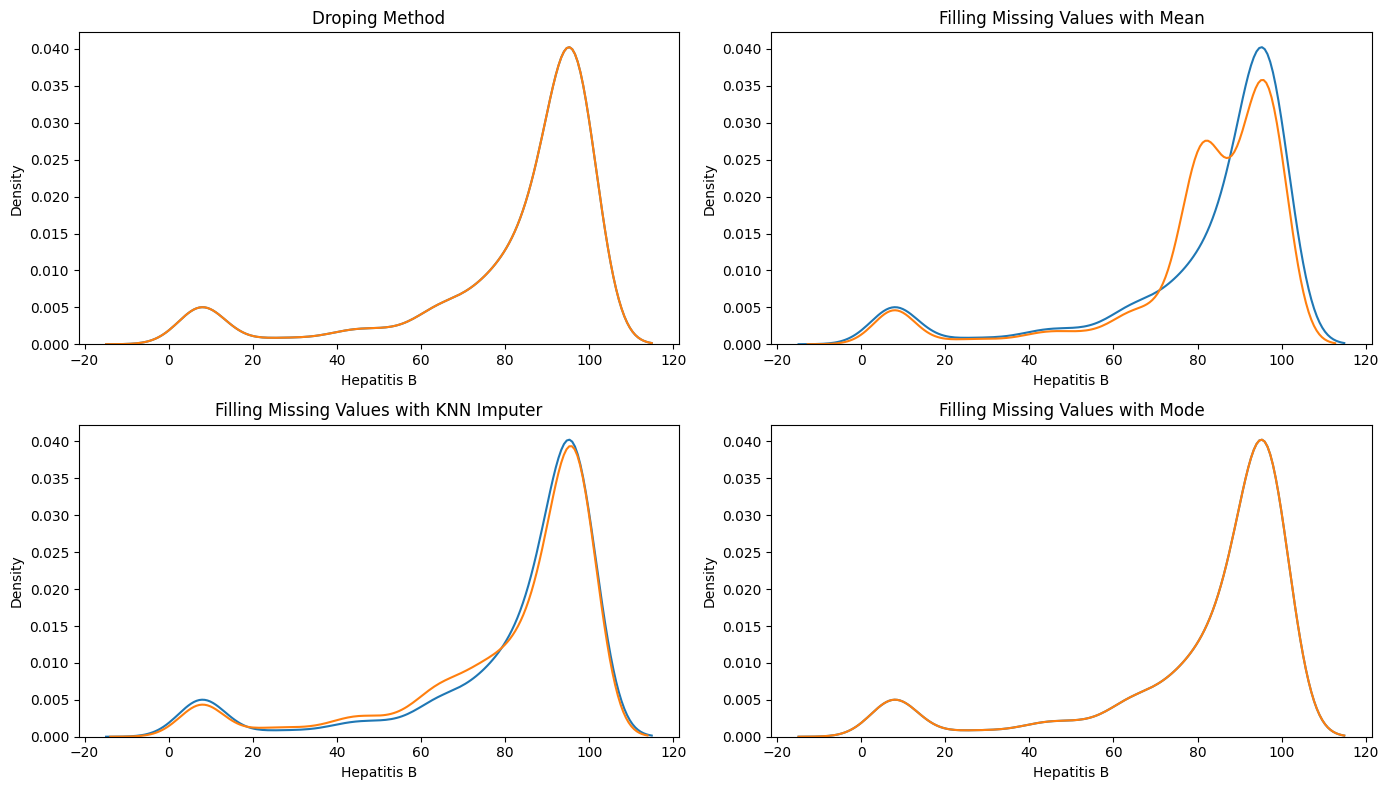

In [18]:
impute_effect('Hepatitis B')

- KNN Imputer works best in this case as well. ✔️

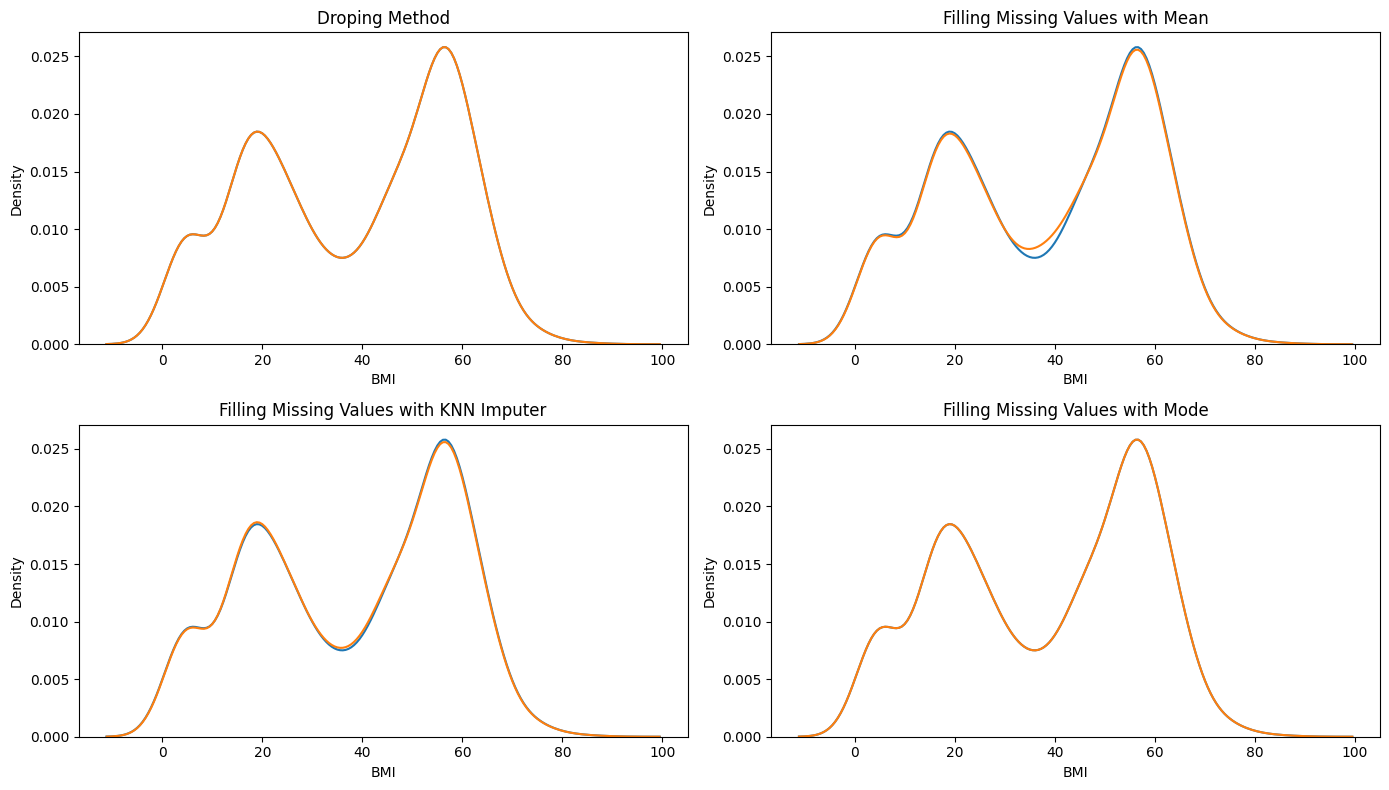

In [19]:
impute_effect('BMI')

KNN ✔️

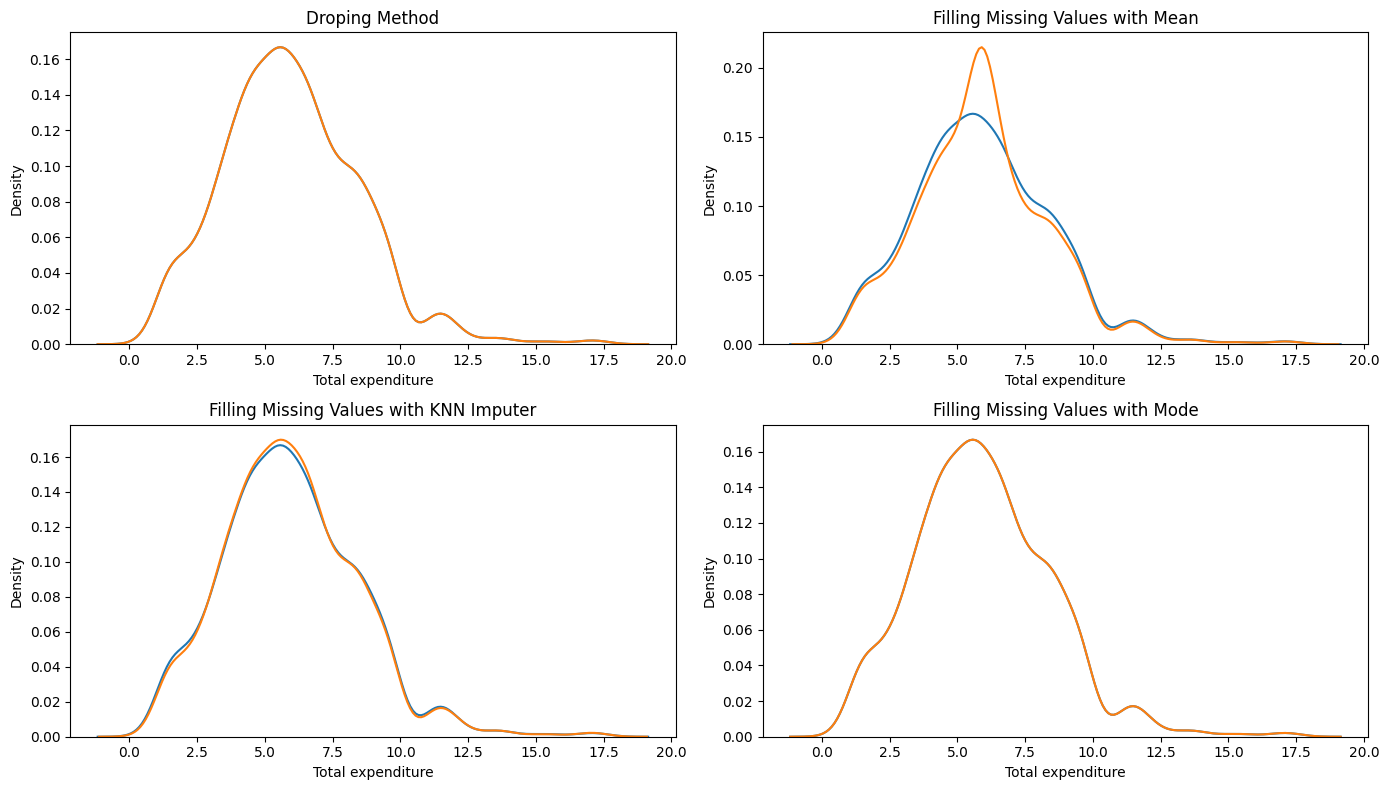

In [20]:
impute_effect('Total expenditure')

Mode ✔️

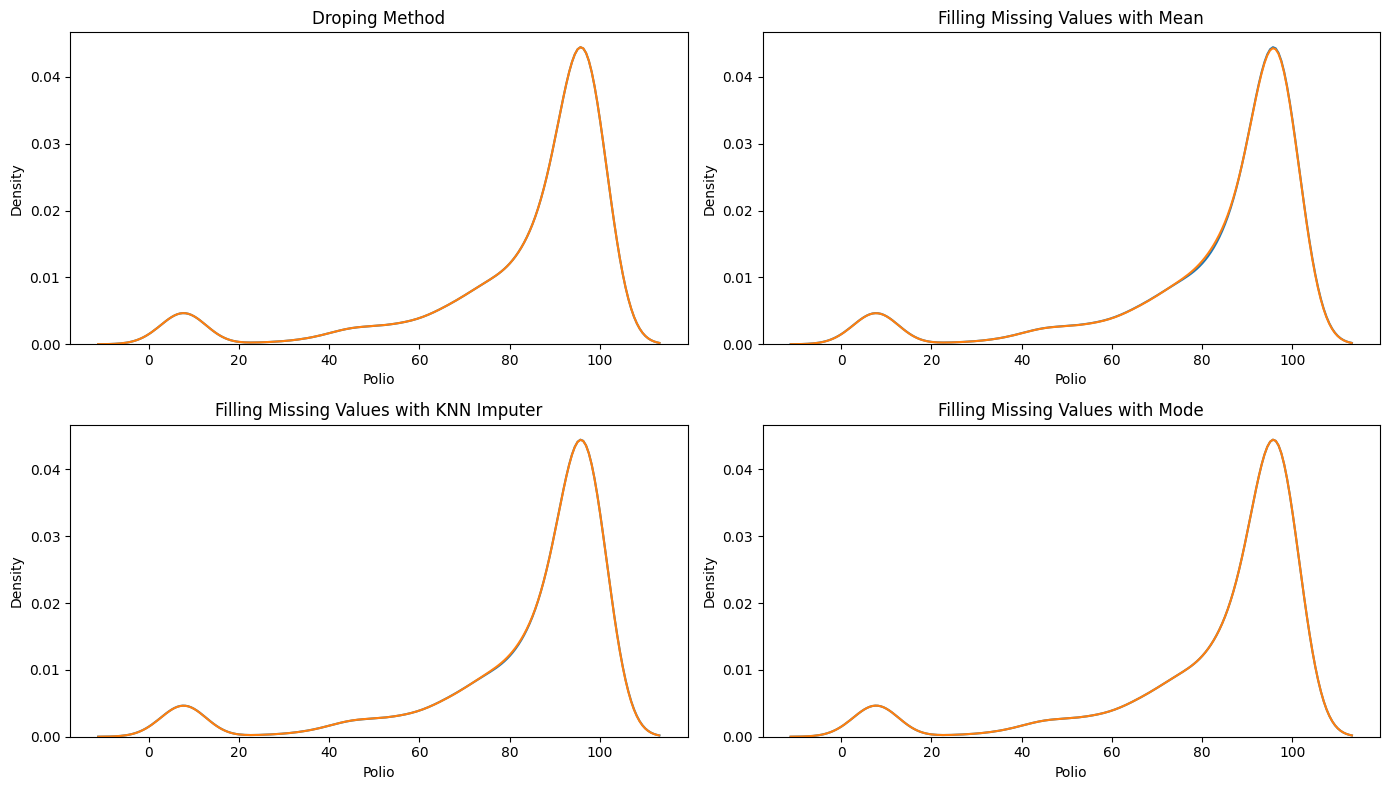

In [21]:
impute_effect('Polio')

KNN ✔️

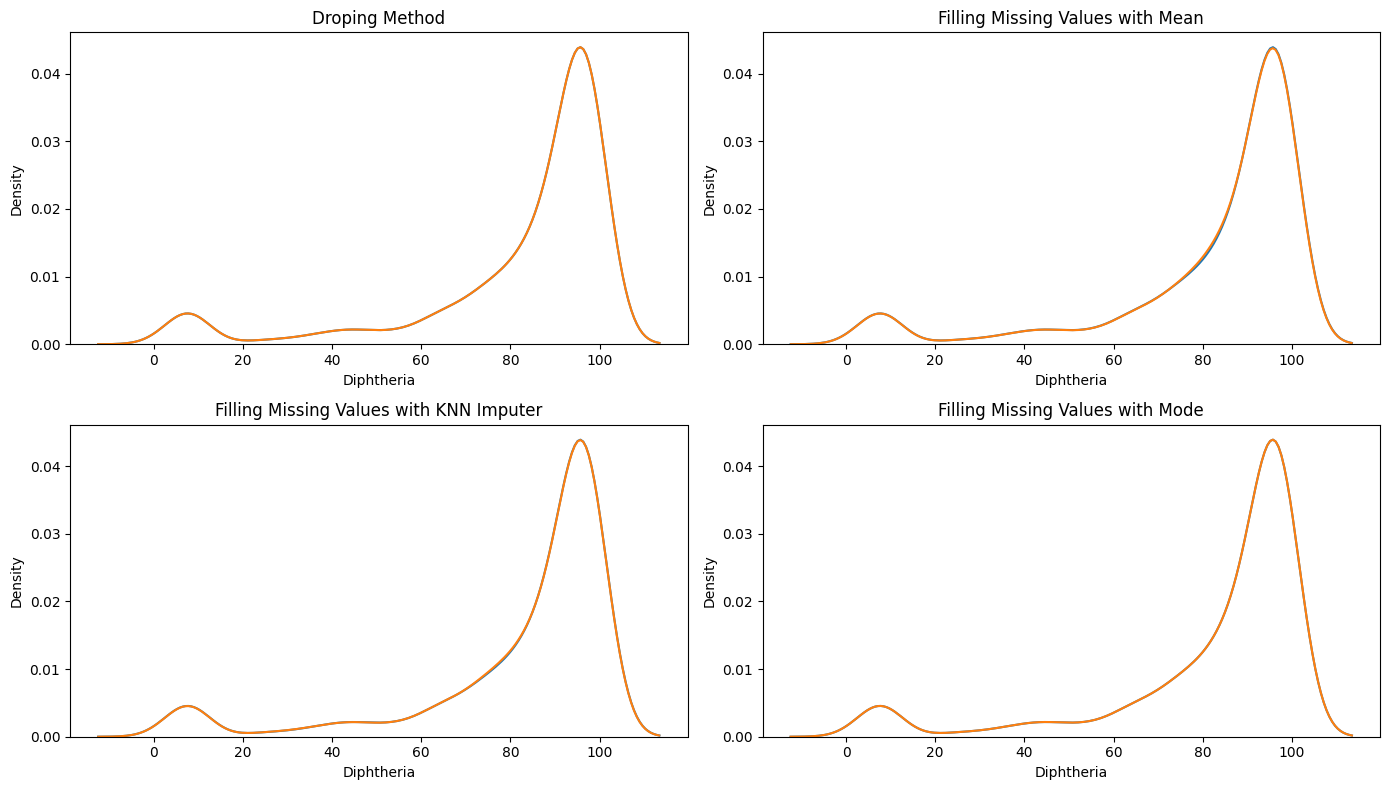

In [22]:
impute_effect('Diphtheria')

Both KNN and Mean 
Mean ✔️

Too many Outliers  we will analyse this column further...

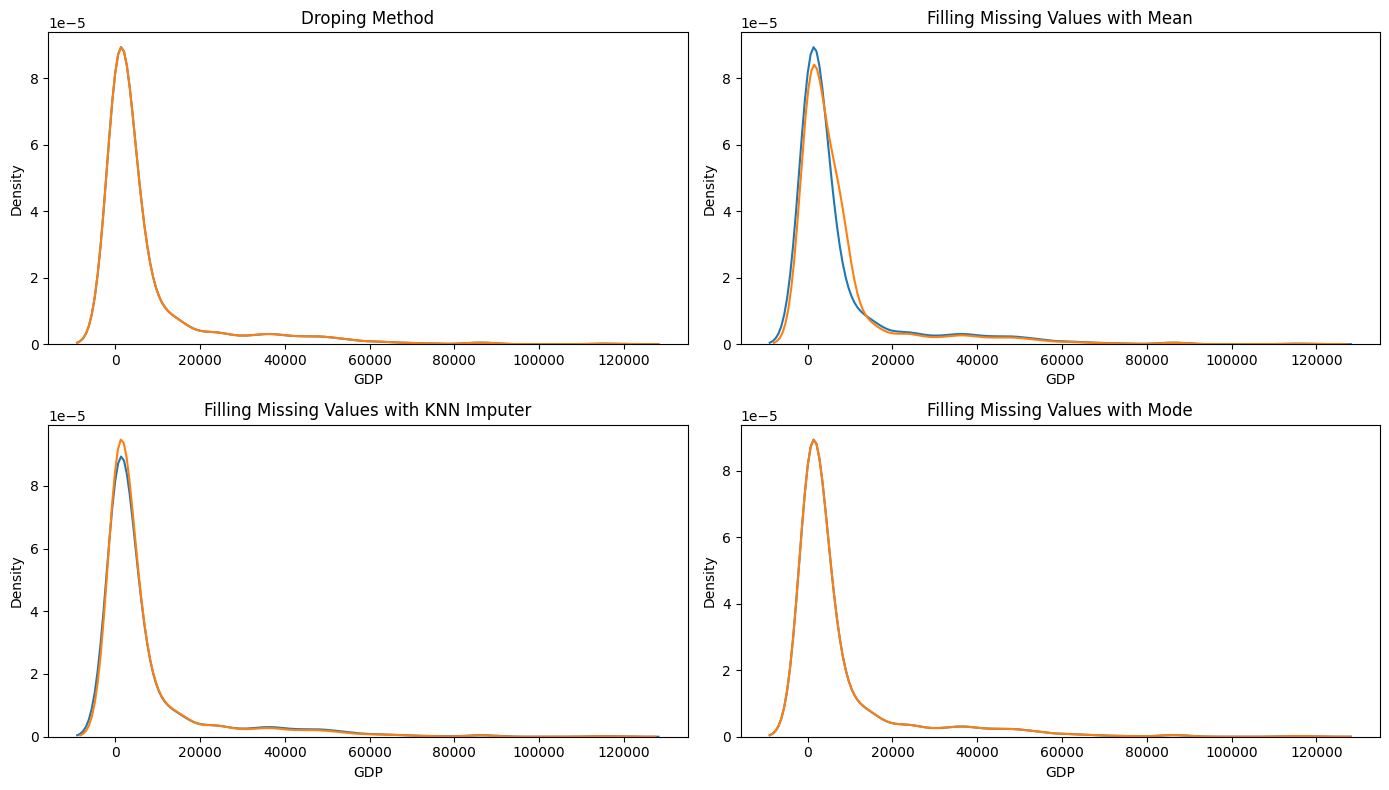

In [23]:
impute_effect('GDP')

Mode ✔️

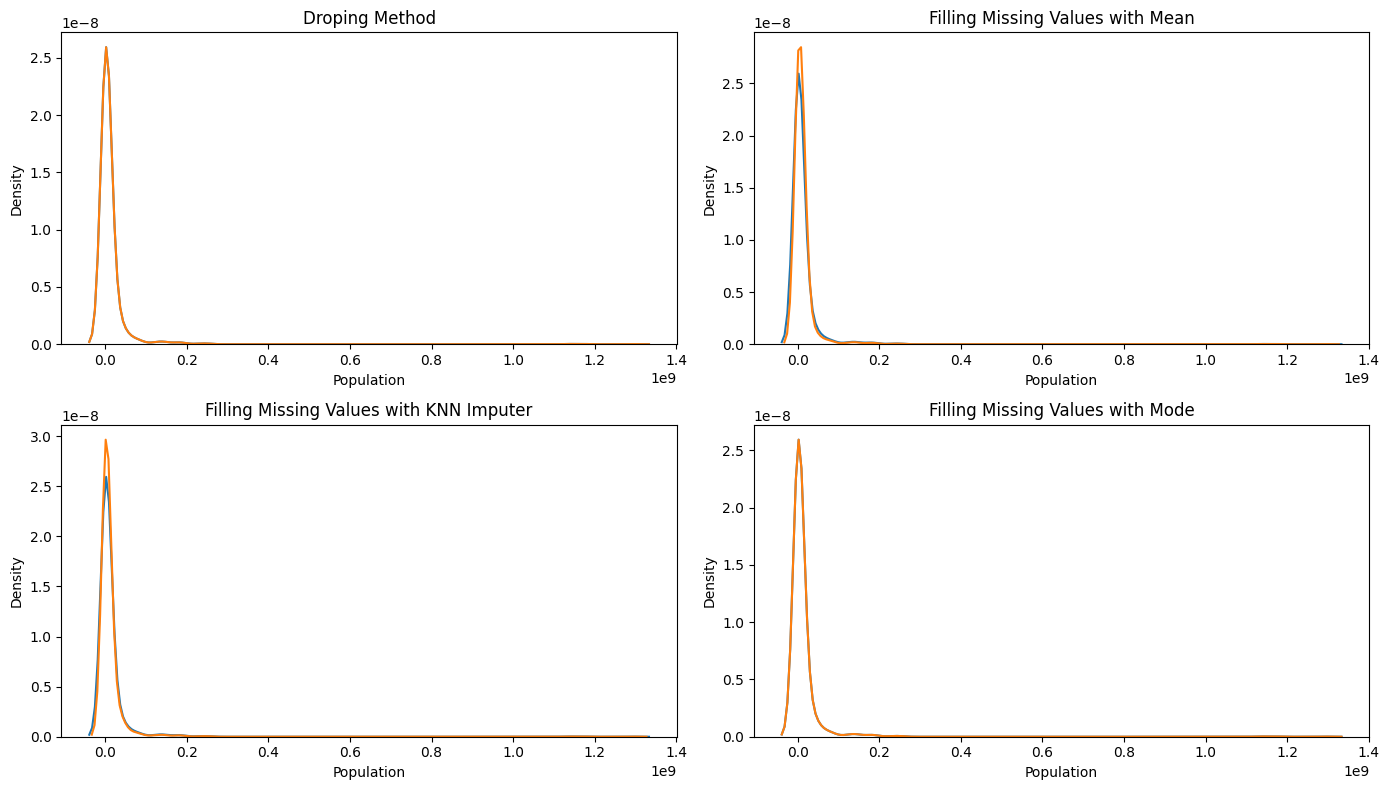

In [24]:
impute_effect('Population')

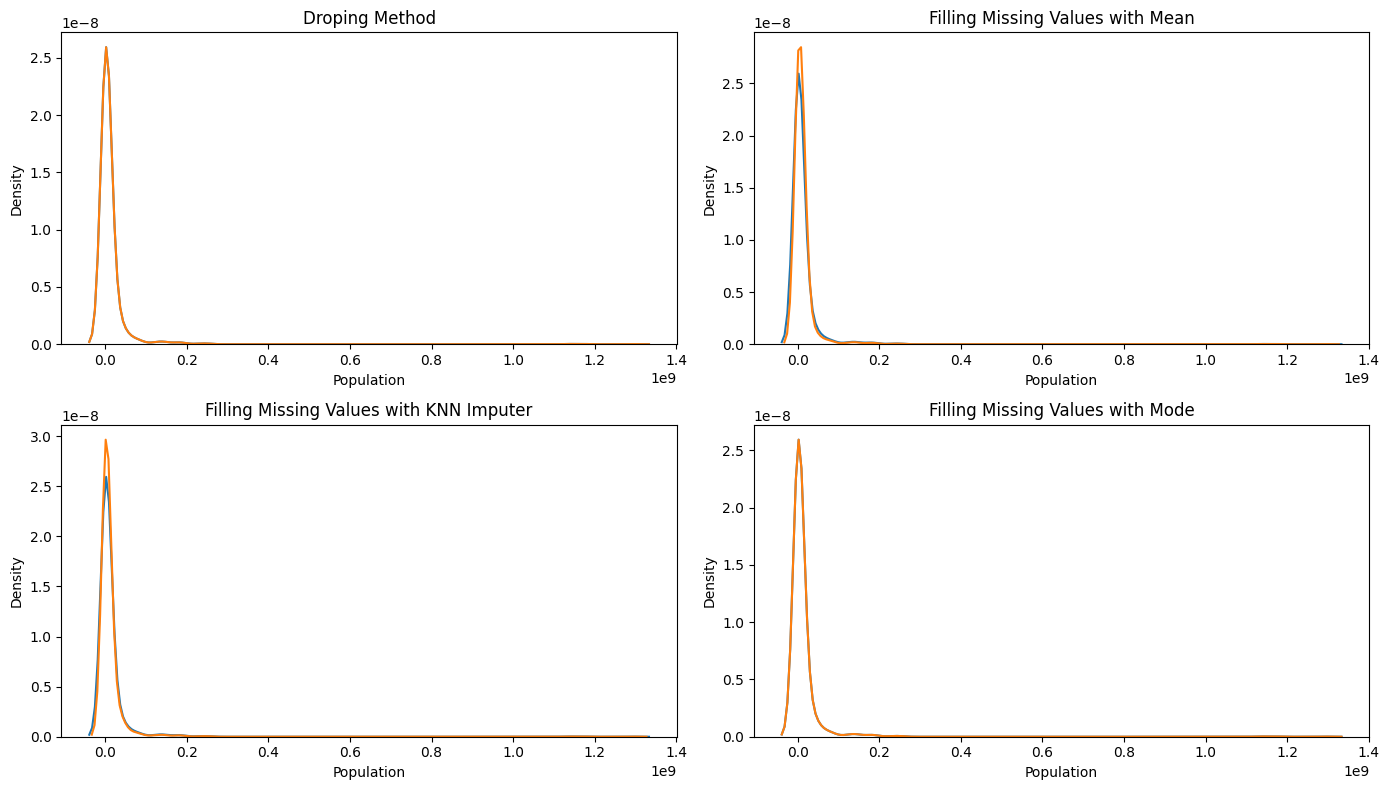

In [25]:
impute_effect('Population')

Mode ✔️

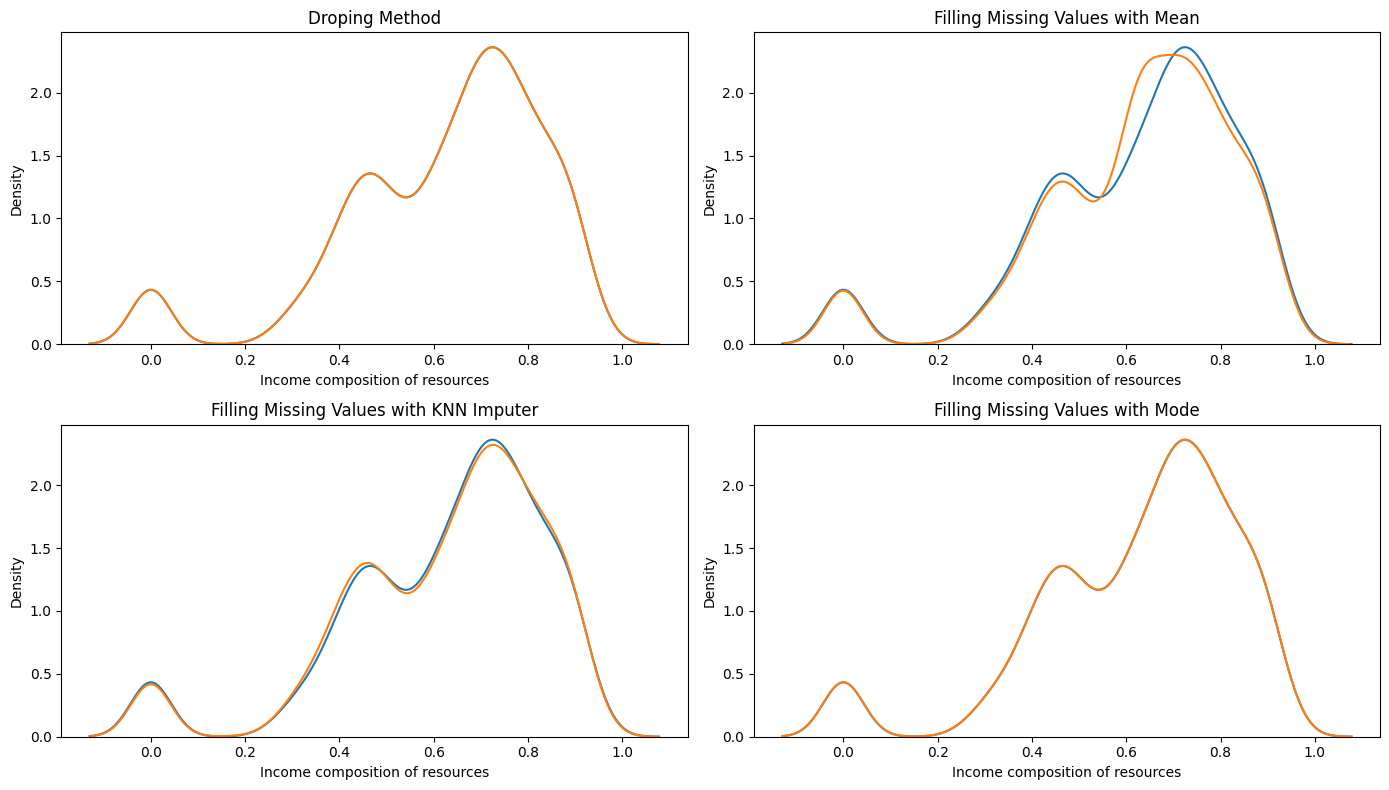

In [26]:
impute_effect('Income composition of resources')

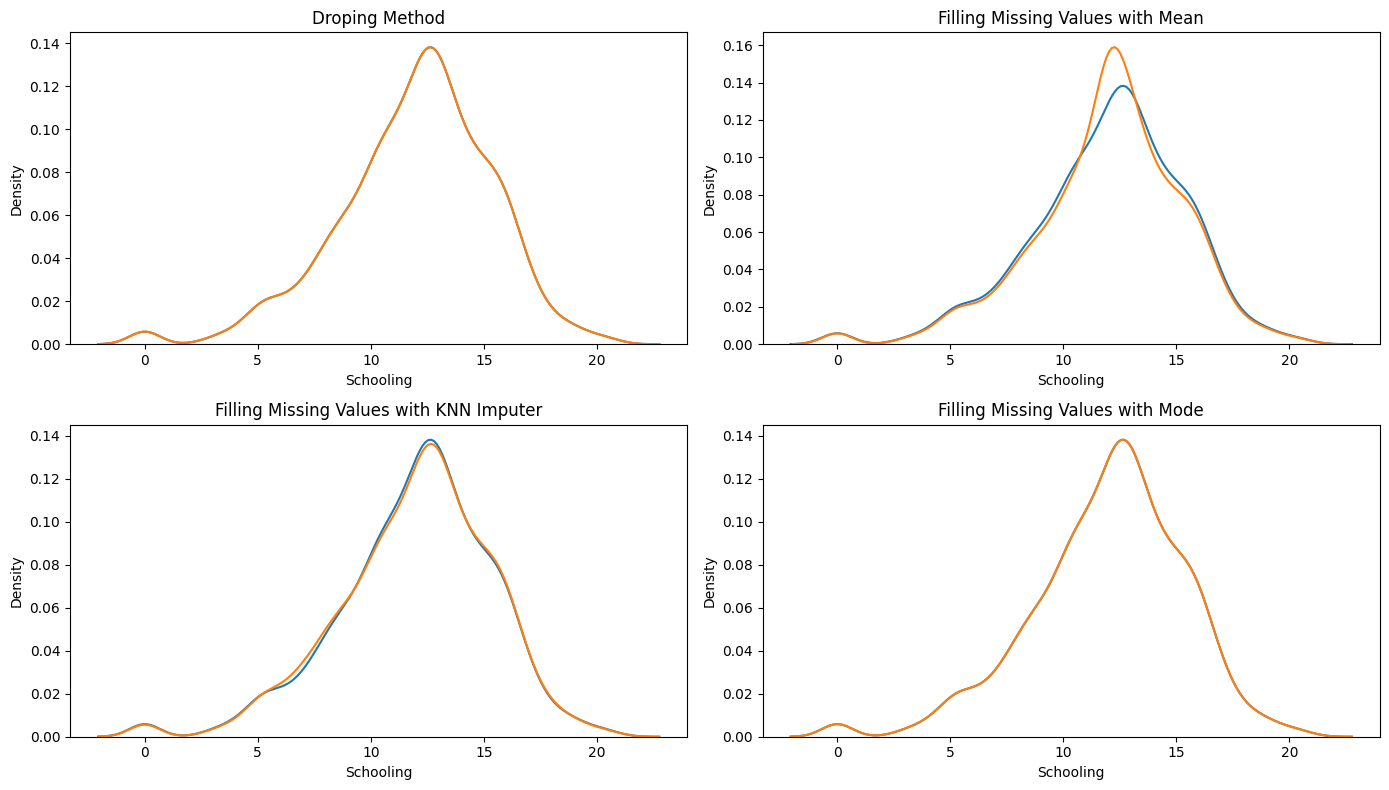

In [27]:
impute_effect('Schooling')

KDE ✔️

KNN_Imputation gives the best overall distribution after imputing compared to Mode and Mean imputation... Also the KNN_Imputation imputes null_values with different values instead of the single constant value in case of Mode and Mean imputation.

Drop generally gives the same distribution but we lost the most of the data in that case...



For now as it is our temp data, we have no risk of using Knn on our whole dataset to fill missing values. In the original data preprocessing we will do .fit and .transform separately

In [28]:

cols_to_impute = cleaned_data_temp.drop(columns=['Life expectancy', 'Country', 'Status']).columns


imputed_array = knn.fit_transform(cleaned_data_temp[cols_to_impute])


cleaned_data_temp = pd.DataFrame(imputed_array, columns=cols_to_impute, index=cleaned_data_temp.index)

In [29]:
cleaned_data_temp['Country'] = data['Country']
cleaned_data_temp['Status'] = data['Status']
cleaned_data_temp['Life expectancy'] = data['Life expectancy']

In [30]:
cleaned_data_temp.isnull().sum()

Year                                0
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
BMI                                 0
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                          0
HIV/AIDS                            0
GDP                                 0
Population                          0
thinness  1-19 years                0
thinness 5-9 years                  0
Income composition of resources     0
Schooling                           0
Country                             0
Status                              0
Life expectancy                    10
dtype: int64

In [31]:
cleaned_data_temp.shape

(2938, 22)

In [32]:
cleaned_data_temp.dropna(inplace=True)

In [33]:
cleaned_data_temp.shape

(2928, 22)

No NULL values left...

**Outlier Detection and Removal**

In [34]:
Num_Cols = cleaned_data_temp.select_dtypes(include='number')

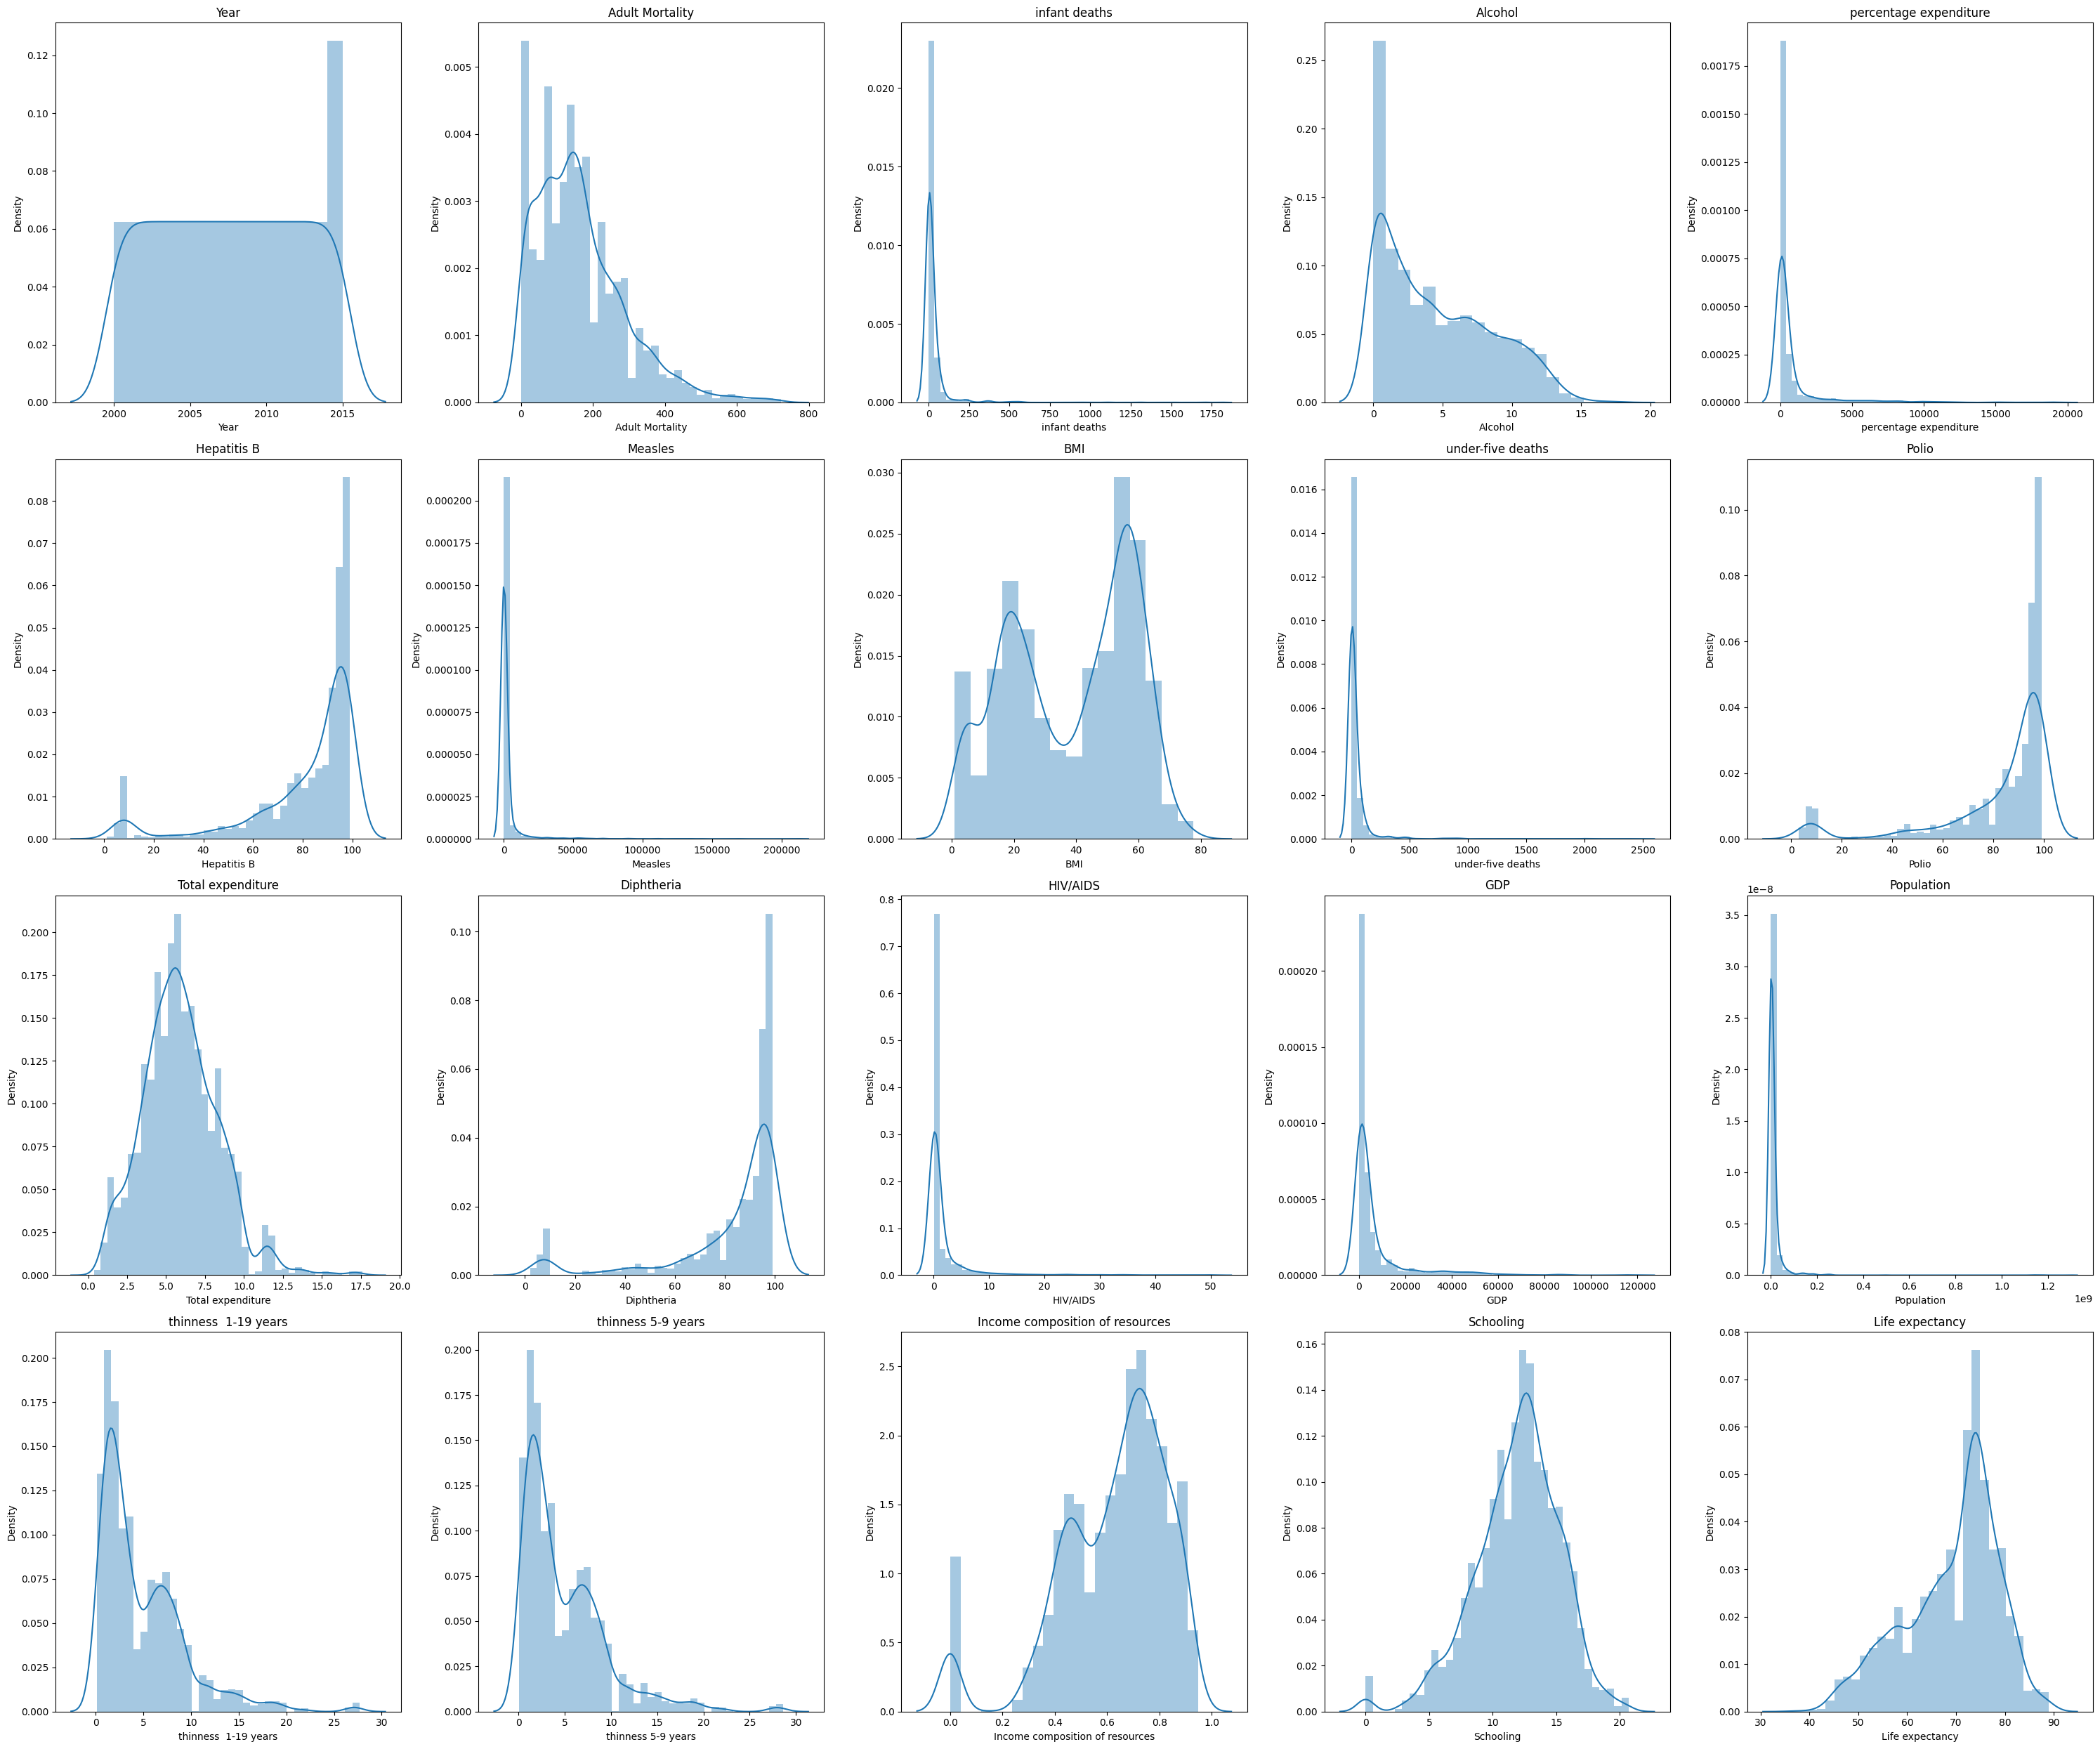

In [35]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(30,25))
index=0
ax=ax.flatten()


for col,value in Num_Cols.items():
    if index >= 24:
        break
    sns.distplot(value,ax=ax[index])
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

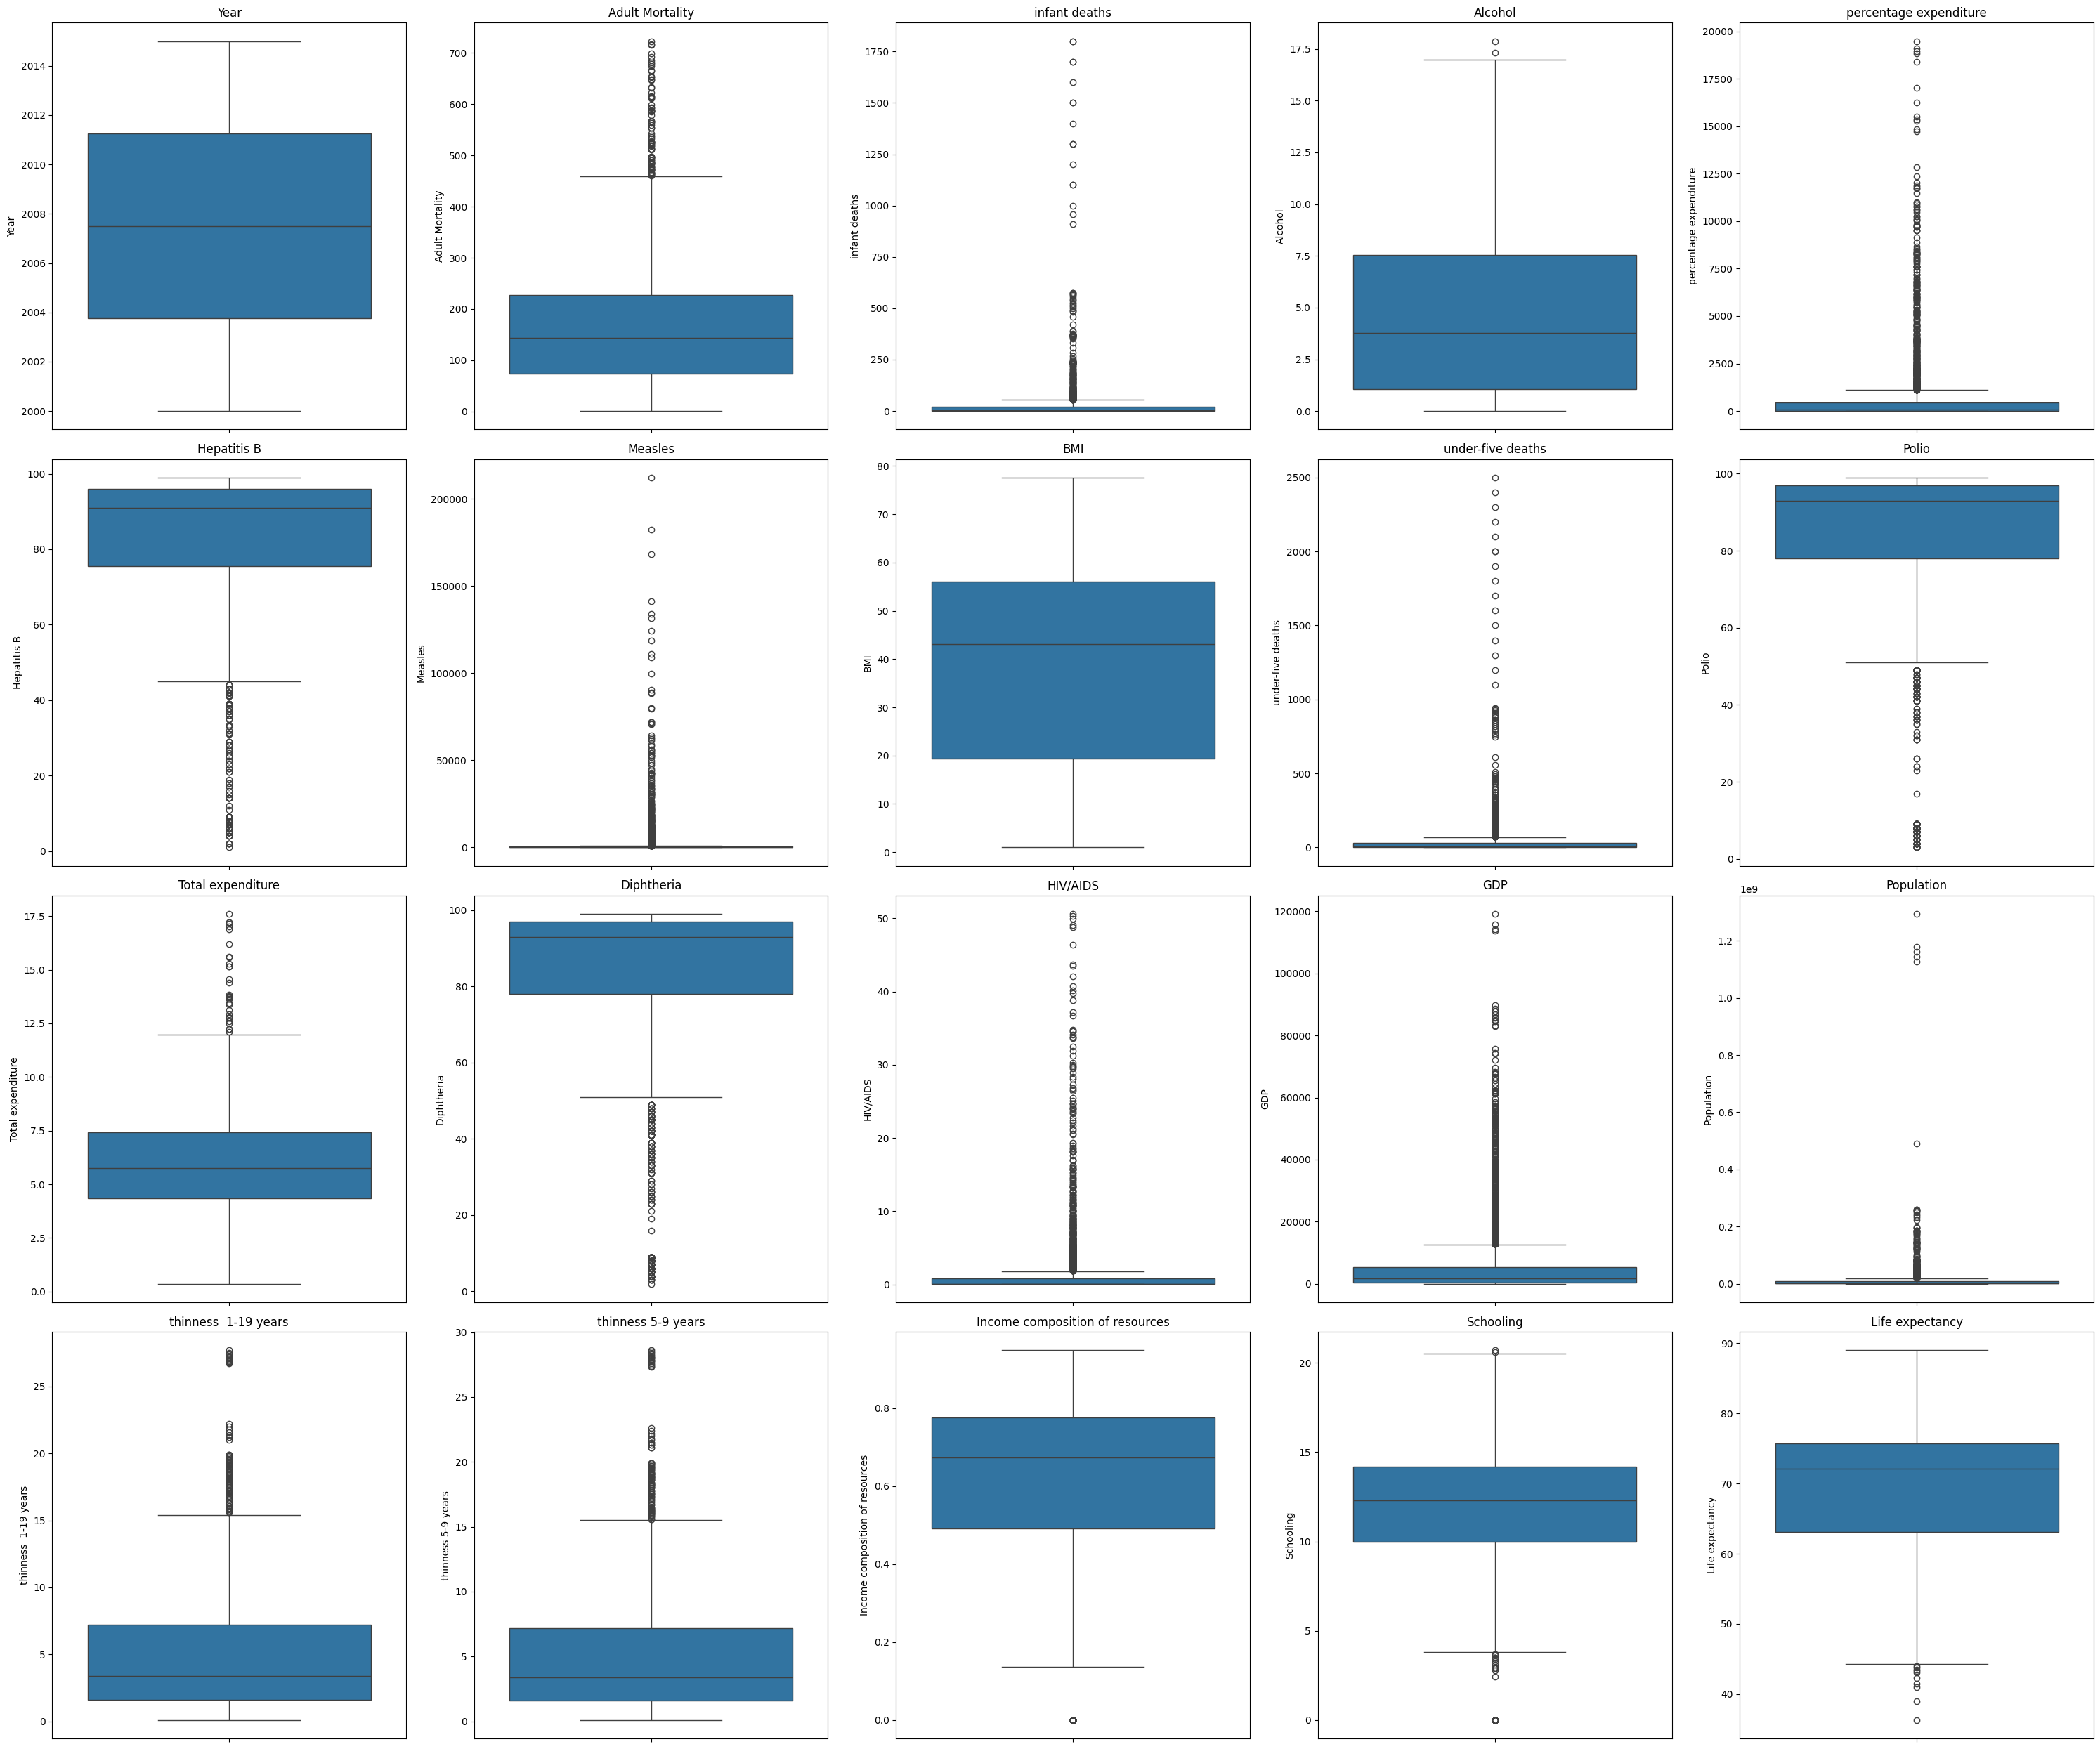

In [36]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(30,25))
index=0
ax=ax.flatten()


for col,value in Num_Cols.items():
    if index >= 24:
        break
    sns.boxplot(value,ax=ax[index])
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

As cleared before lot of the numerical columns have outliers

In [37]:
def IQR_outlier_removal (data,col):
    
    Q1 = np.quantile(data[col], 0.25)
    Median = data[col].median()
    Q3 = np.quantile(data[col], 0.75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR


    return data[(data[col] <= upper_bound) & (data[col] >= lower_bound)]



In [38]:
def IQR_outlier_Capping (data,col):
    
    Q1 = np.quantile(data[col], 0.25)
    Median = data[col].median()
    Q3 = np.quantile(data[col], 0.75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    
    data[col] = np.where(
    data[col]>upper_bound,
        upper_bound,
        np.where(
        data[col] < lower_bound,
            lower_bound,
            data[col]
        )
    )
    return data

In [39]:
cleaned_data_temp.shape

(2928, 22)

In [40]:
outlier_columns = Num_Cols.drop(columns=['BMI','Year','Life expectancy']).columns

In [41]:
cleaned_data_temp_rem = cleaned_data_temp.copy()
cleaned_data_temp_cap = cleaned_data_temp.copy()
for col in outlier_columns:
    cleaned_data_temp_rem = IQR_outlier_removal(cleaned_data_temp,col)
    cleaned_data_temp_cap = IQR_outlier_Capping(cleaned_data_temp,col)

In [42]:
cleaned_data_temp_rem.shape

(2884, 22)

In [43]:
cleaned_data_temp_cap.shape

(2928, 22)

In [44]:
cleaned_data_temp_rem

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0     2015.0            263.0           55.0     0.01               71.279624   
1     2014.0            271.0           55.0     0.01               73.523582   
2     2013.0            268.0           55.0     0.01               73.219243   
3     2012.0            272.0           55.0     0.01               78.184215   
4     2011.0            275.0           55.0     0.01                7.097109   
...      ...              ...            ...      ...                     ...   
2933  2004.0            459.0           27.0     4.36                0.000000   
2934  2003.0            459.0           26.0     4.06                0.000000   
2935  2002.0             73.0           25.0     4.43                0.000000   
2936  2001.0            459.0           25.0     1.72                0.000000   
2937  2000.0            459.0           24.0     1.68                0.000000   

      Hepatitis B  Measles   BMI  under-five deaths  Polio  Total expenditure  \
0            65.0  905.625  19.1               70.0   49.5               8.16   
1            62.0  492.000  18.6               70.0   58.0               8.18   
2            64.0  430.000  18.1               70.0   62.0               8.13   
3            67.0  905.625  17.6               70.0   67.0               8.52   
4            68.0  905.625  17.2               70.0   68.0               7.87   
...           ...      ...   ...                ...    ...                ...   
2933         68.0   31.000  27.1               42.0   67.0               7.13   
2934         45.0  905.625  26.7               41.0   49.5               6.52   
2935         73.0  304.000  26.3               40.0   73.0               6.53   
2936         76.0  529.000  25.9               39.0   76.0               6.16   
2937         79.0  905.625  25.5               39.0   78.0               7.10   

      Diphtheria  HIV/AIDS         GDP    Population  thinness  1-19 years  \
0           65.0      0.10  584.259210  1.978591e+07                  15.6   
1           62.0      0.10  612.696514  3.275820e+05                  15.6   
2           64.0      0.10  631.744976  1.978591e+07                  15.6   
3           67.0      0.10  669.959000  3.696958e+06                  15.6   
4           68.0      0.10   63.537231  2.978599e+06                  15.6   
...          ...       ...         ...           ...                   ...   
2933        65.0      1.85  454.366654  1.277751e+07                   9.4   
2934        68.0      1.85  453.351155  1.263390e+07                   9.8   
2935        71.0      1.85   57.348340  1.255250e+05                   1.2   
2936        75.0      1.85  548.587312  1.236616e+07                   1.6   
2937        78.0      1.85  547.358878  1.222225e+07                  11.0   

      thinness 5-9 years  Income composition of resources  Schooling  \
0                   15.6                            0.479       10.1   
1                   15.6                            0.476       10.0   
2                   15.6                            0.470        9.9   
3                   15.6                            0.463        9.8   
4                   15.6                            0.454        9.5   
...                  ...                              ...        ...   
2933                 9.4                            0.407        9.2   
2934                 9.9                            0.418        9.5   
2935                 1.3                            0.427       10.0   
2936                 1.7                            0.427        9.8   
2937                11.2                            0.434        9.8   

          Country      Status  Life expectancy  
0     Afghanistan  Developing             65.0  
1     Afghanistan  Developing             59.9  
2     Afghanistan  Developing             59.9  
3     Afghanistan  Developing             59.5  
4     Afghanist

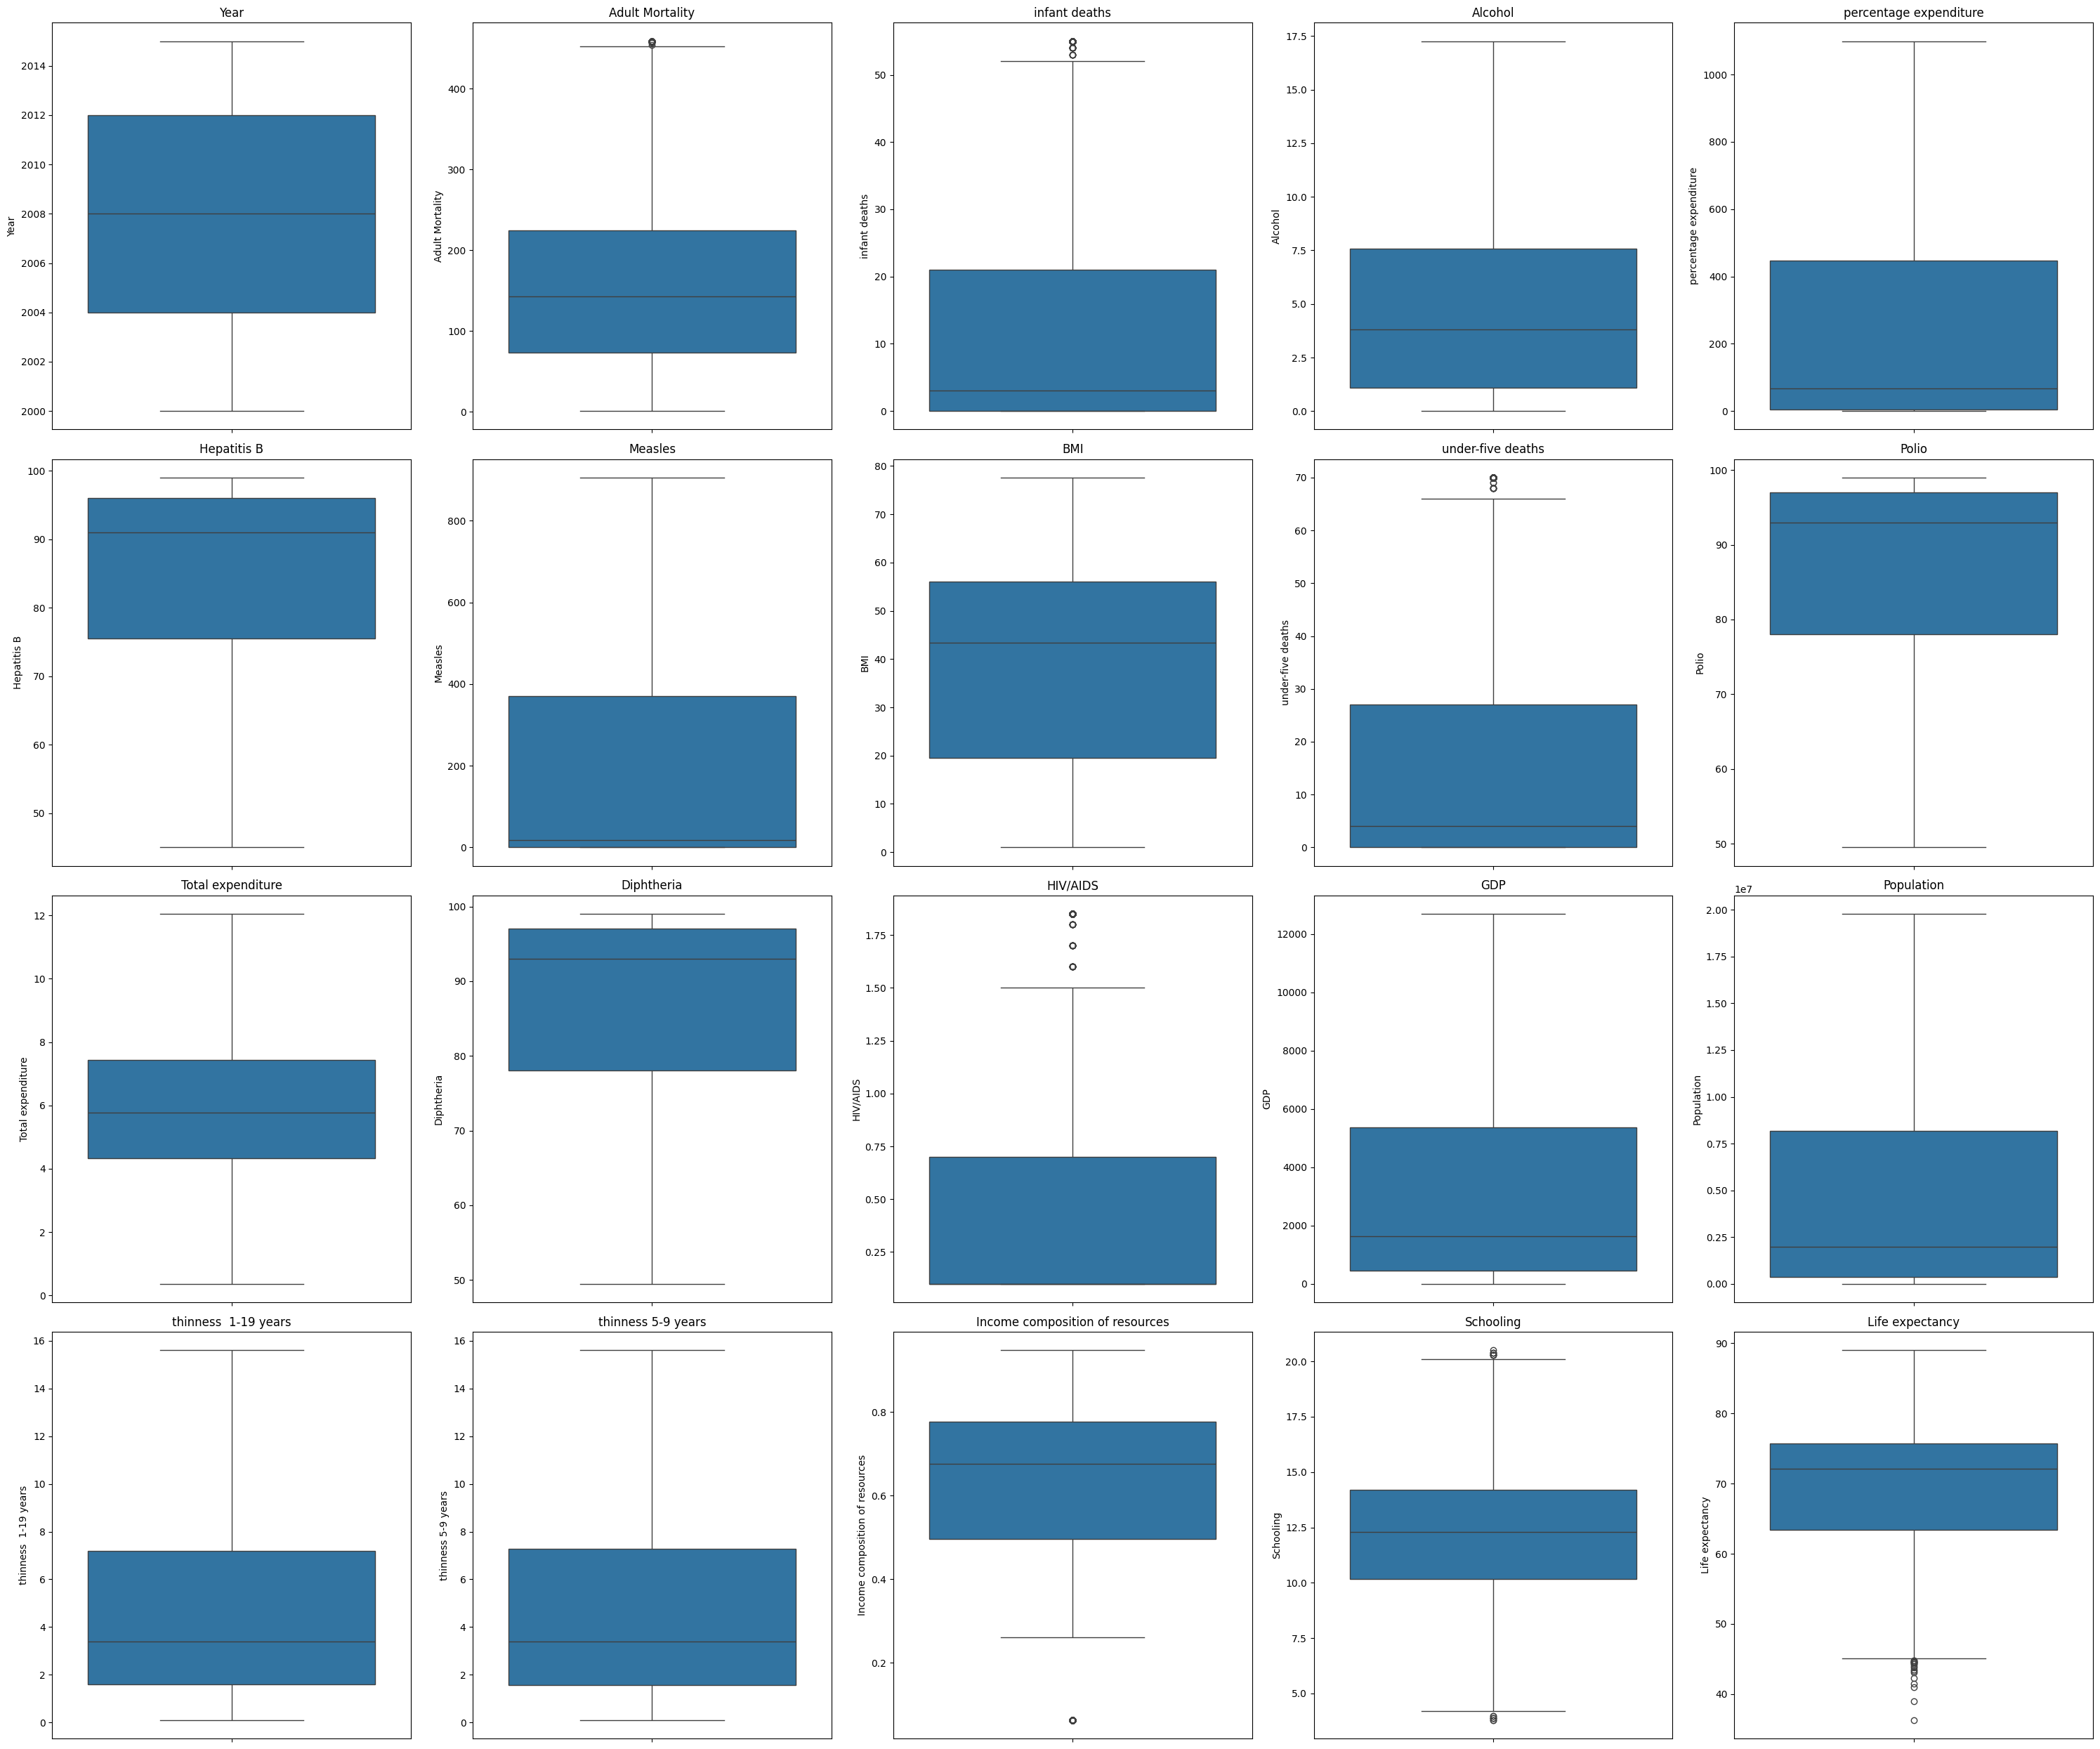

In [45]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(30,25))
index=0
ax=ax.flatten()


for col,value in cleaned_data_temp_rem.select_dtypes(include = 'number').items():
    if index >= 25:
        break
    sns.boxplot(value,ax=ax[index])
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

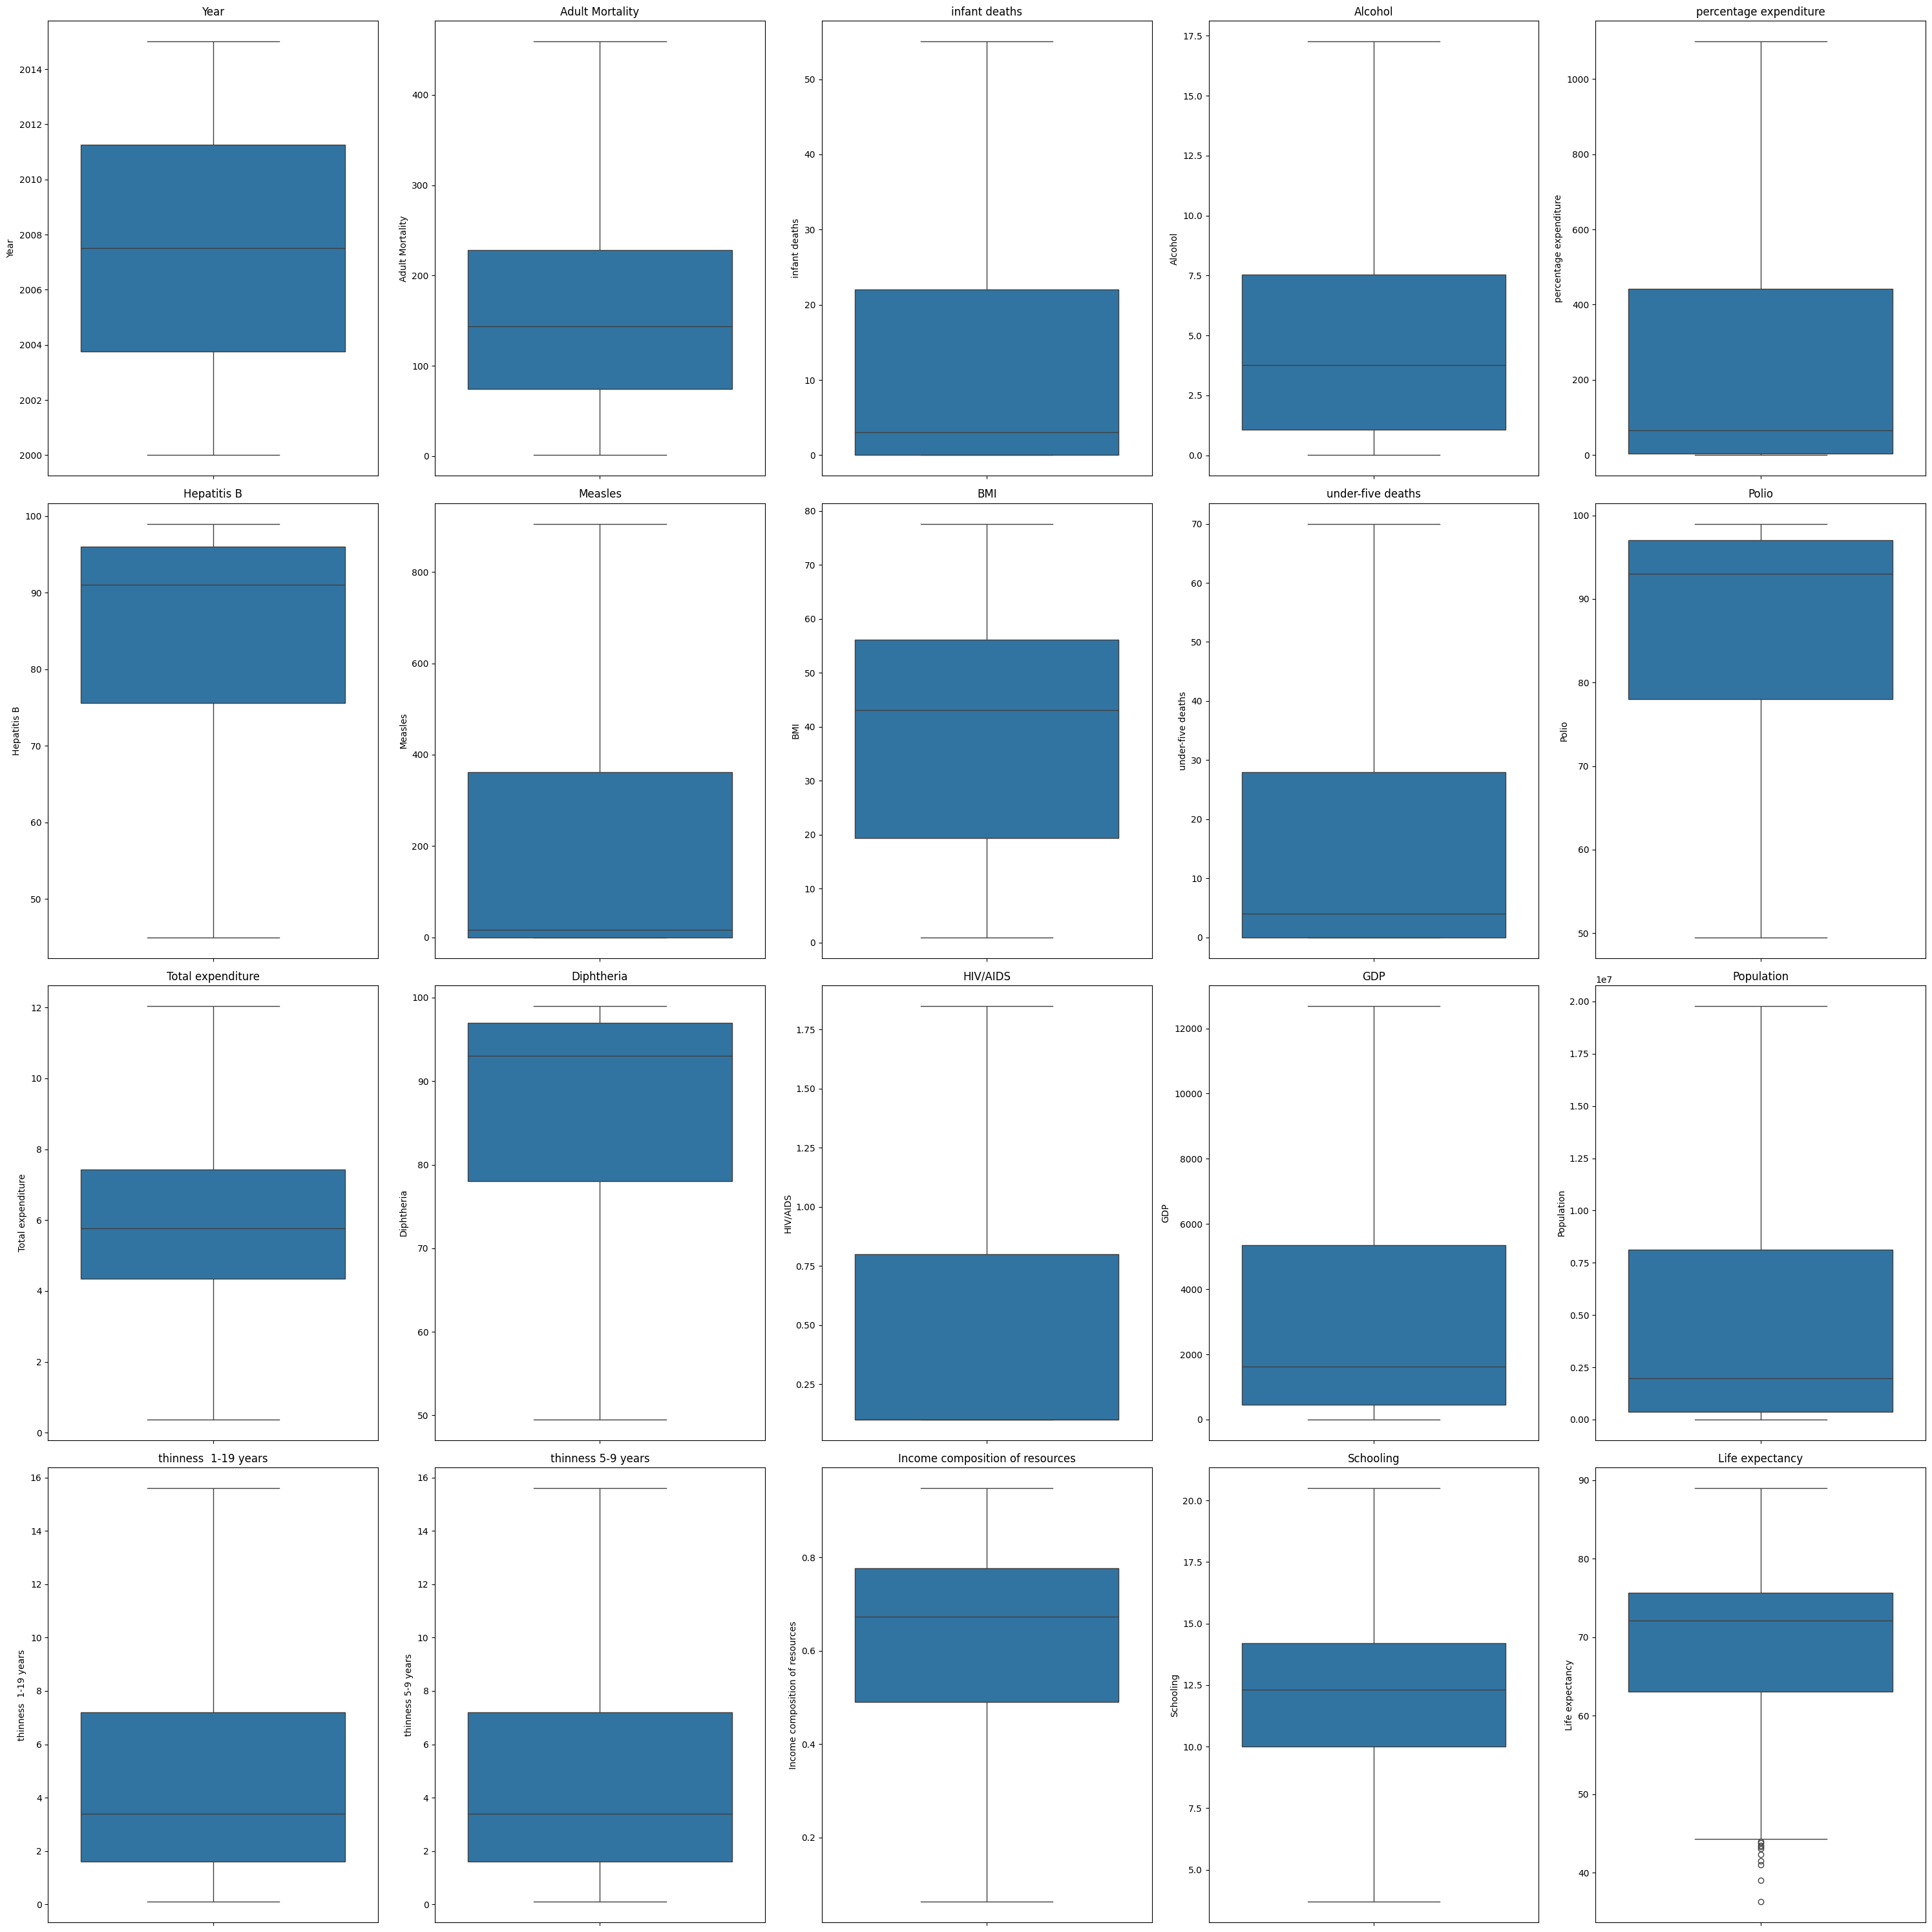

In [46]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(30,30))
index=0
ax=ax.flatten()


for col,value in cleaned_data_temp_cap.select_dtypes(include = 'number').items():
    if index >= 24:
        break
    sns.boxplot(value,ax=ax[index])
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

We will be using the Caping method in this case...

In [47]:
cleaned_data_temp = cleaned_data_temp_cap.copy()

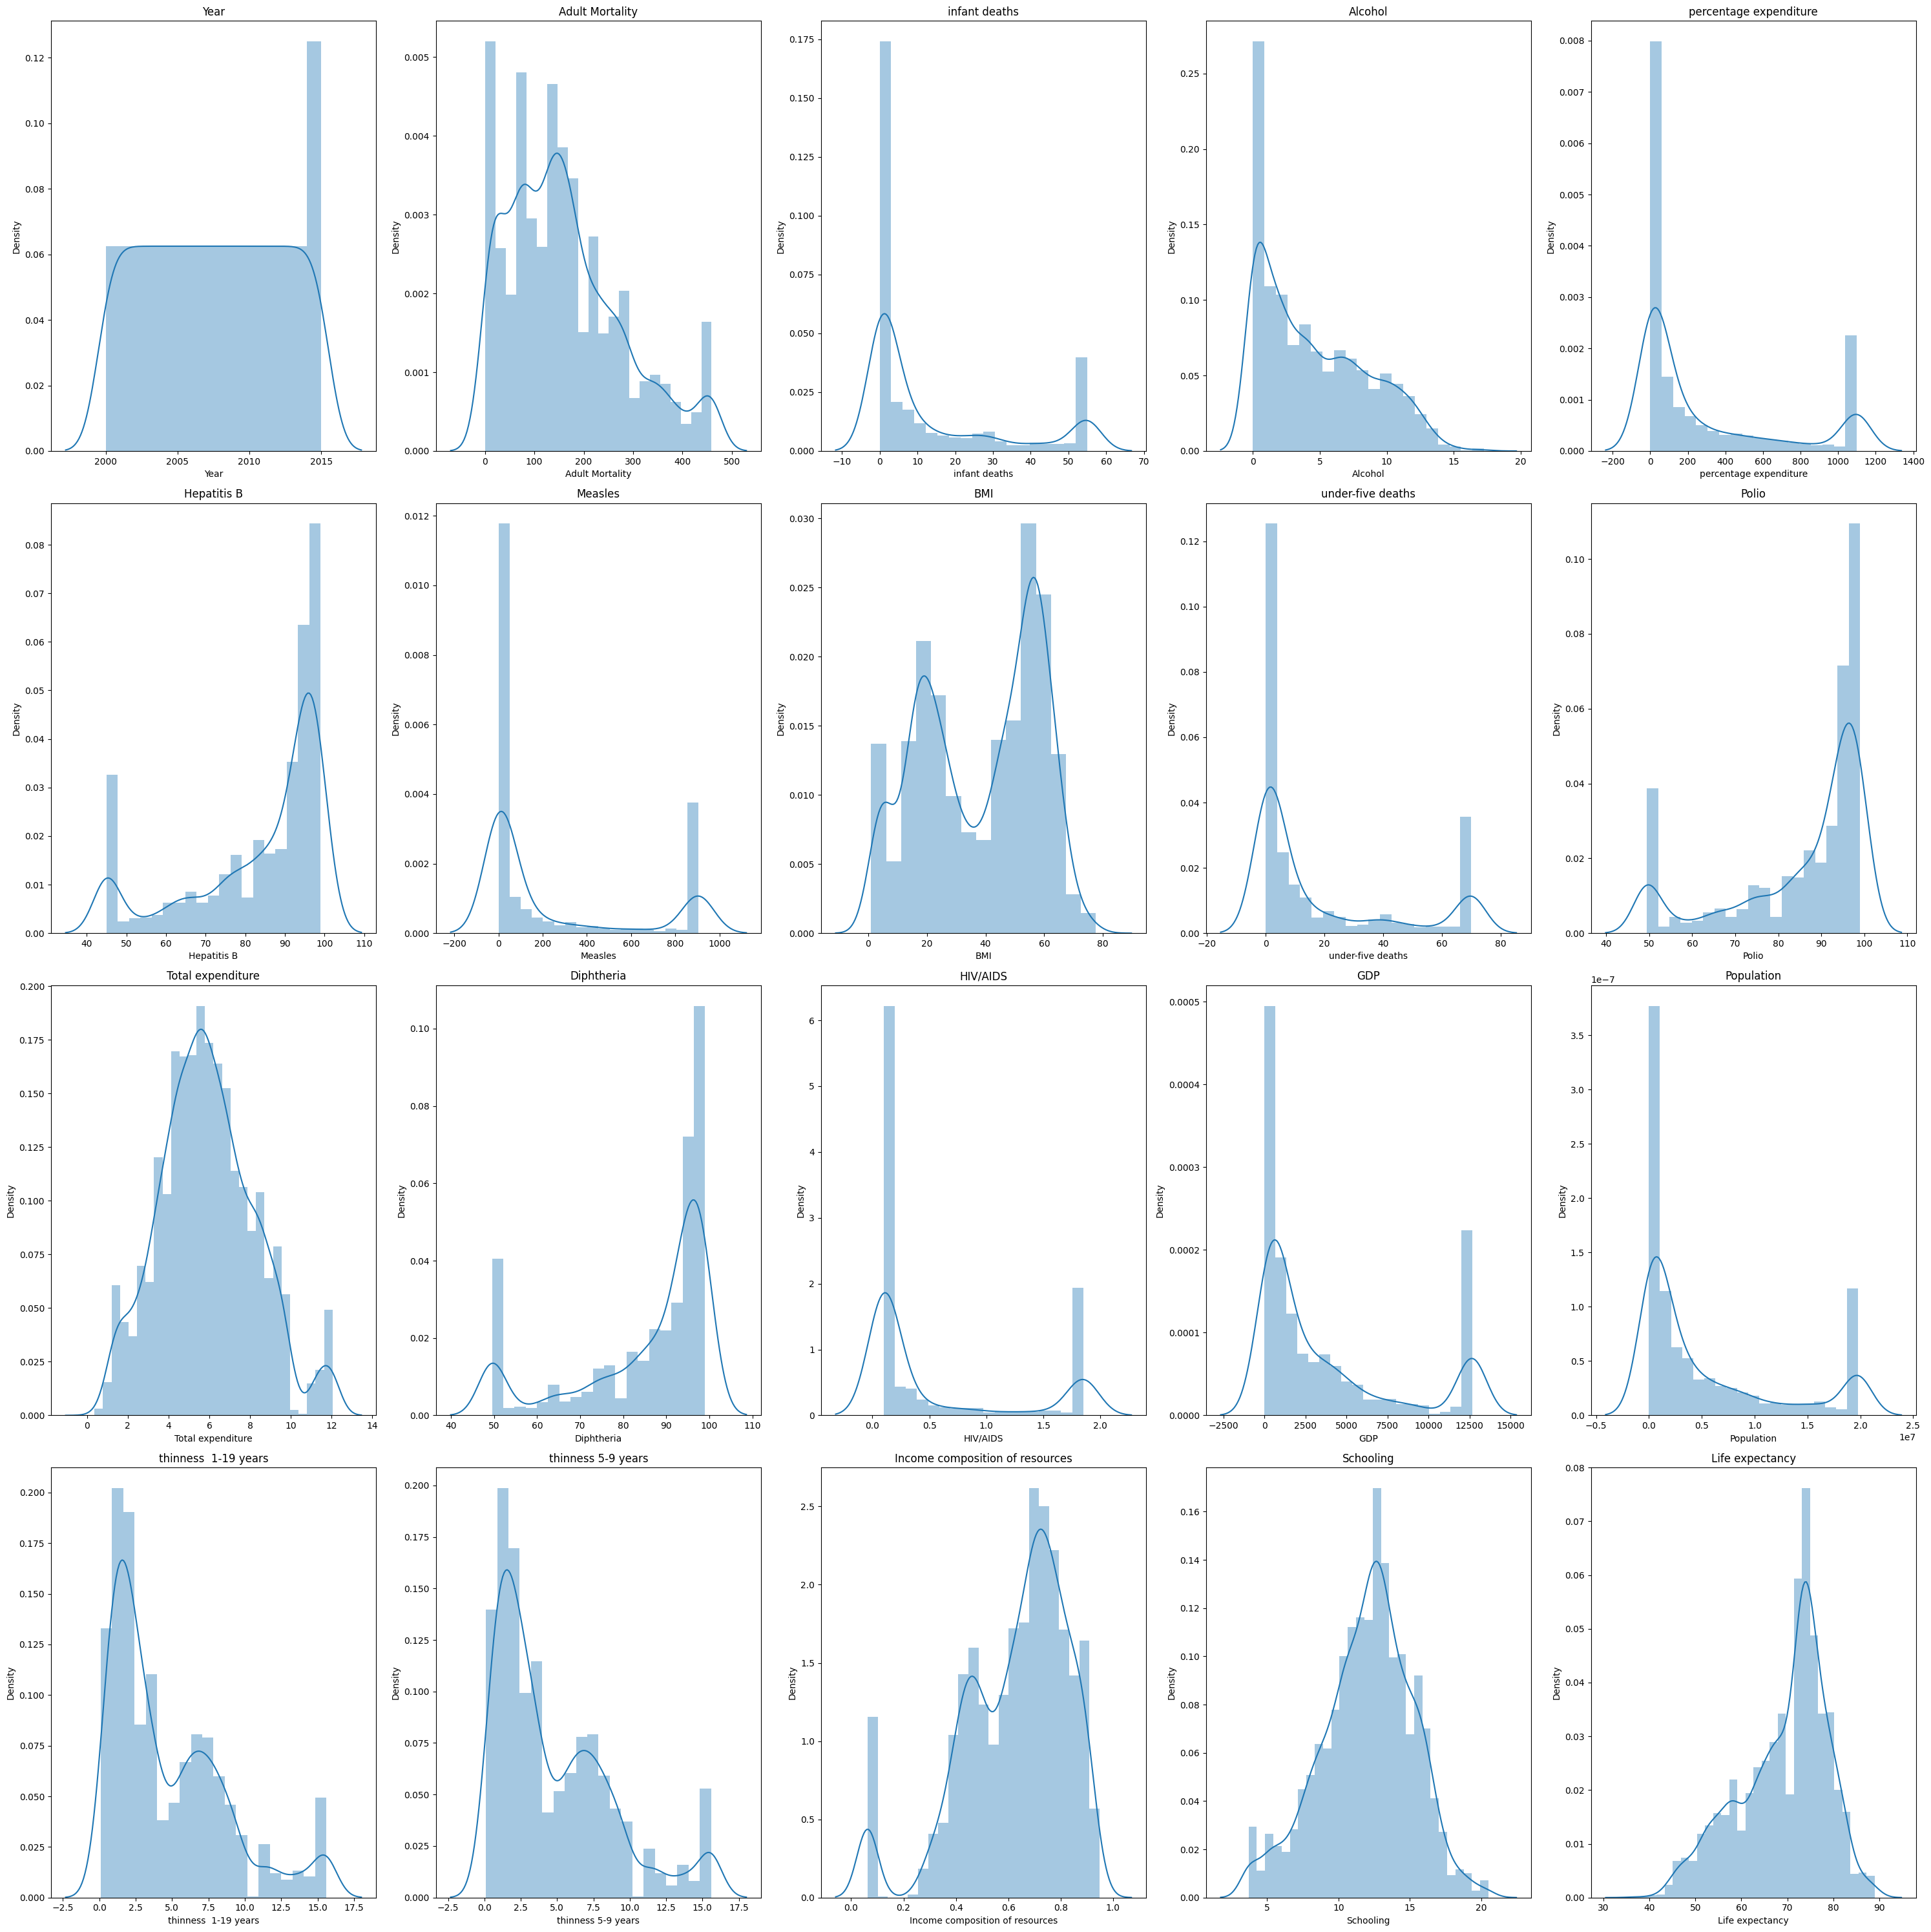

In [48]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(30,30))
index=0
ax=ax.flatten()


for col,value in cleaned_data_temp.select_dtypes(include = 'number').items():
    if index >= 24:
        break
    sns.distplot(value,ax=ax[index])
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

All the outliers are removed

As we can see most of our data is either left or right skewed... So we will be doing necessary transformations accordingly

<Axes: xlabel='under-five deaths', ylabel='Density'>

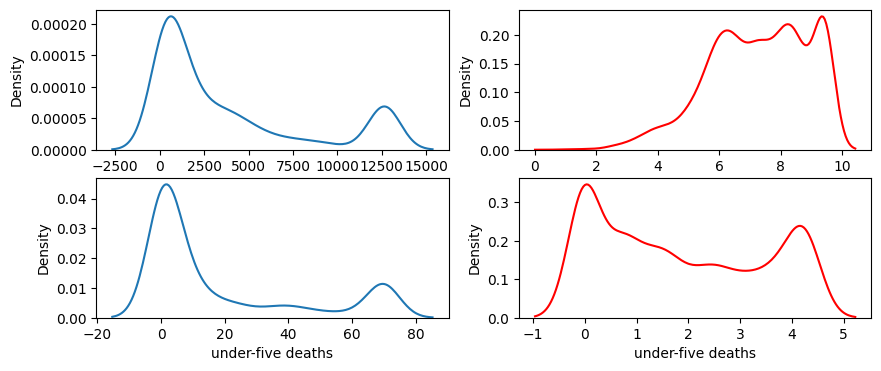

In [49]:
plt.figure(figsize=(10,4))

plt.subplot(2,2,1)
sns.kdeplot(cleaned_data_temp['GDP'])
plt.subplot(2,2,2)
sns.kdeplot(np.log1p(cleaned_data_temp['GDP']),color='red')

plt.subplot(2,2,3)
sns.kdeplot(cleaned_data_temp["under-five deaths"])

plt.subplot(2,2,4)
sns.kdeplot(np.log1p(cleaned_data_temp['under-five deaths']),color='red')

some of the columns will definitely have the good impact on right skewed data... 

<Axes: xlabel='Hepatitis B', ylabel='Density'>

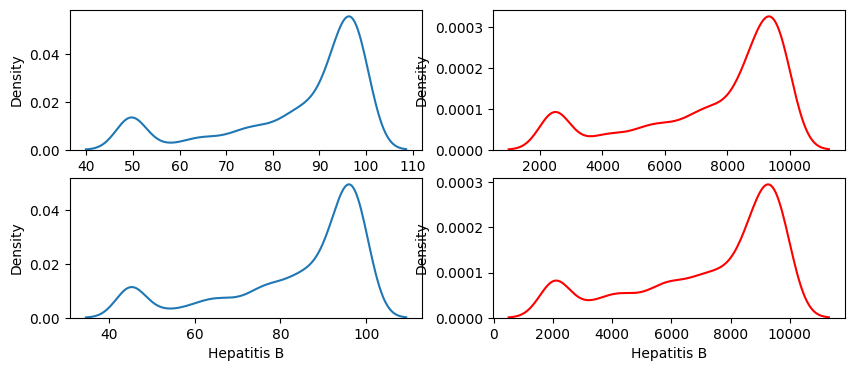

In [50]:
plt.figure(figsize=(10,4))

plt.subplot(2,2,1)
sns.kdeplot(cleaned_data_temp['Diphtheria'])
plt.subplot(2,2,2)
sns.kdeplot(np.square(cleaned_data_temp['Diphtheria']),color='red')

plt.subplot(2,2,3)
sns.kdeplot(cleaned_data_temp["Hepatitis B"])

plt.subplot(2,2,4)
sns.kdeplot(np.square(cleaned_data_temp['Hepatitis B']),color='red')

No affect for left skewed Data...

In [51]:
def log_transformation(data,col):
    data[col] = np.log1p(data[col])
    return data

In [52]:
columns_to_transform = cleaned_data_temp.drop(columns=['Year','Hepatitis B','Polio','BMI','Total expenditure','Diphtheria','Income composition of resources', 'Schooling',
       'Country', 'Status', 'Life expectancy']).columns

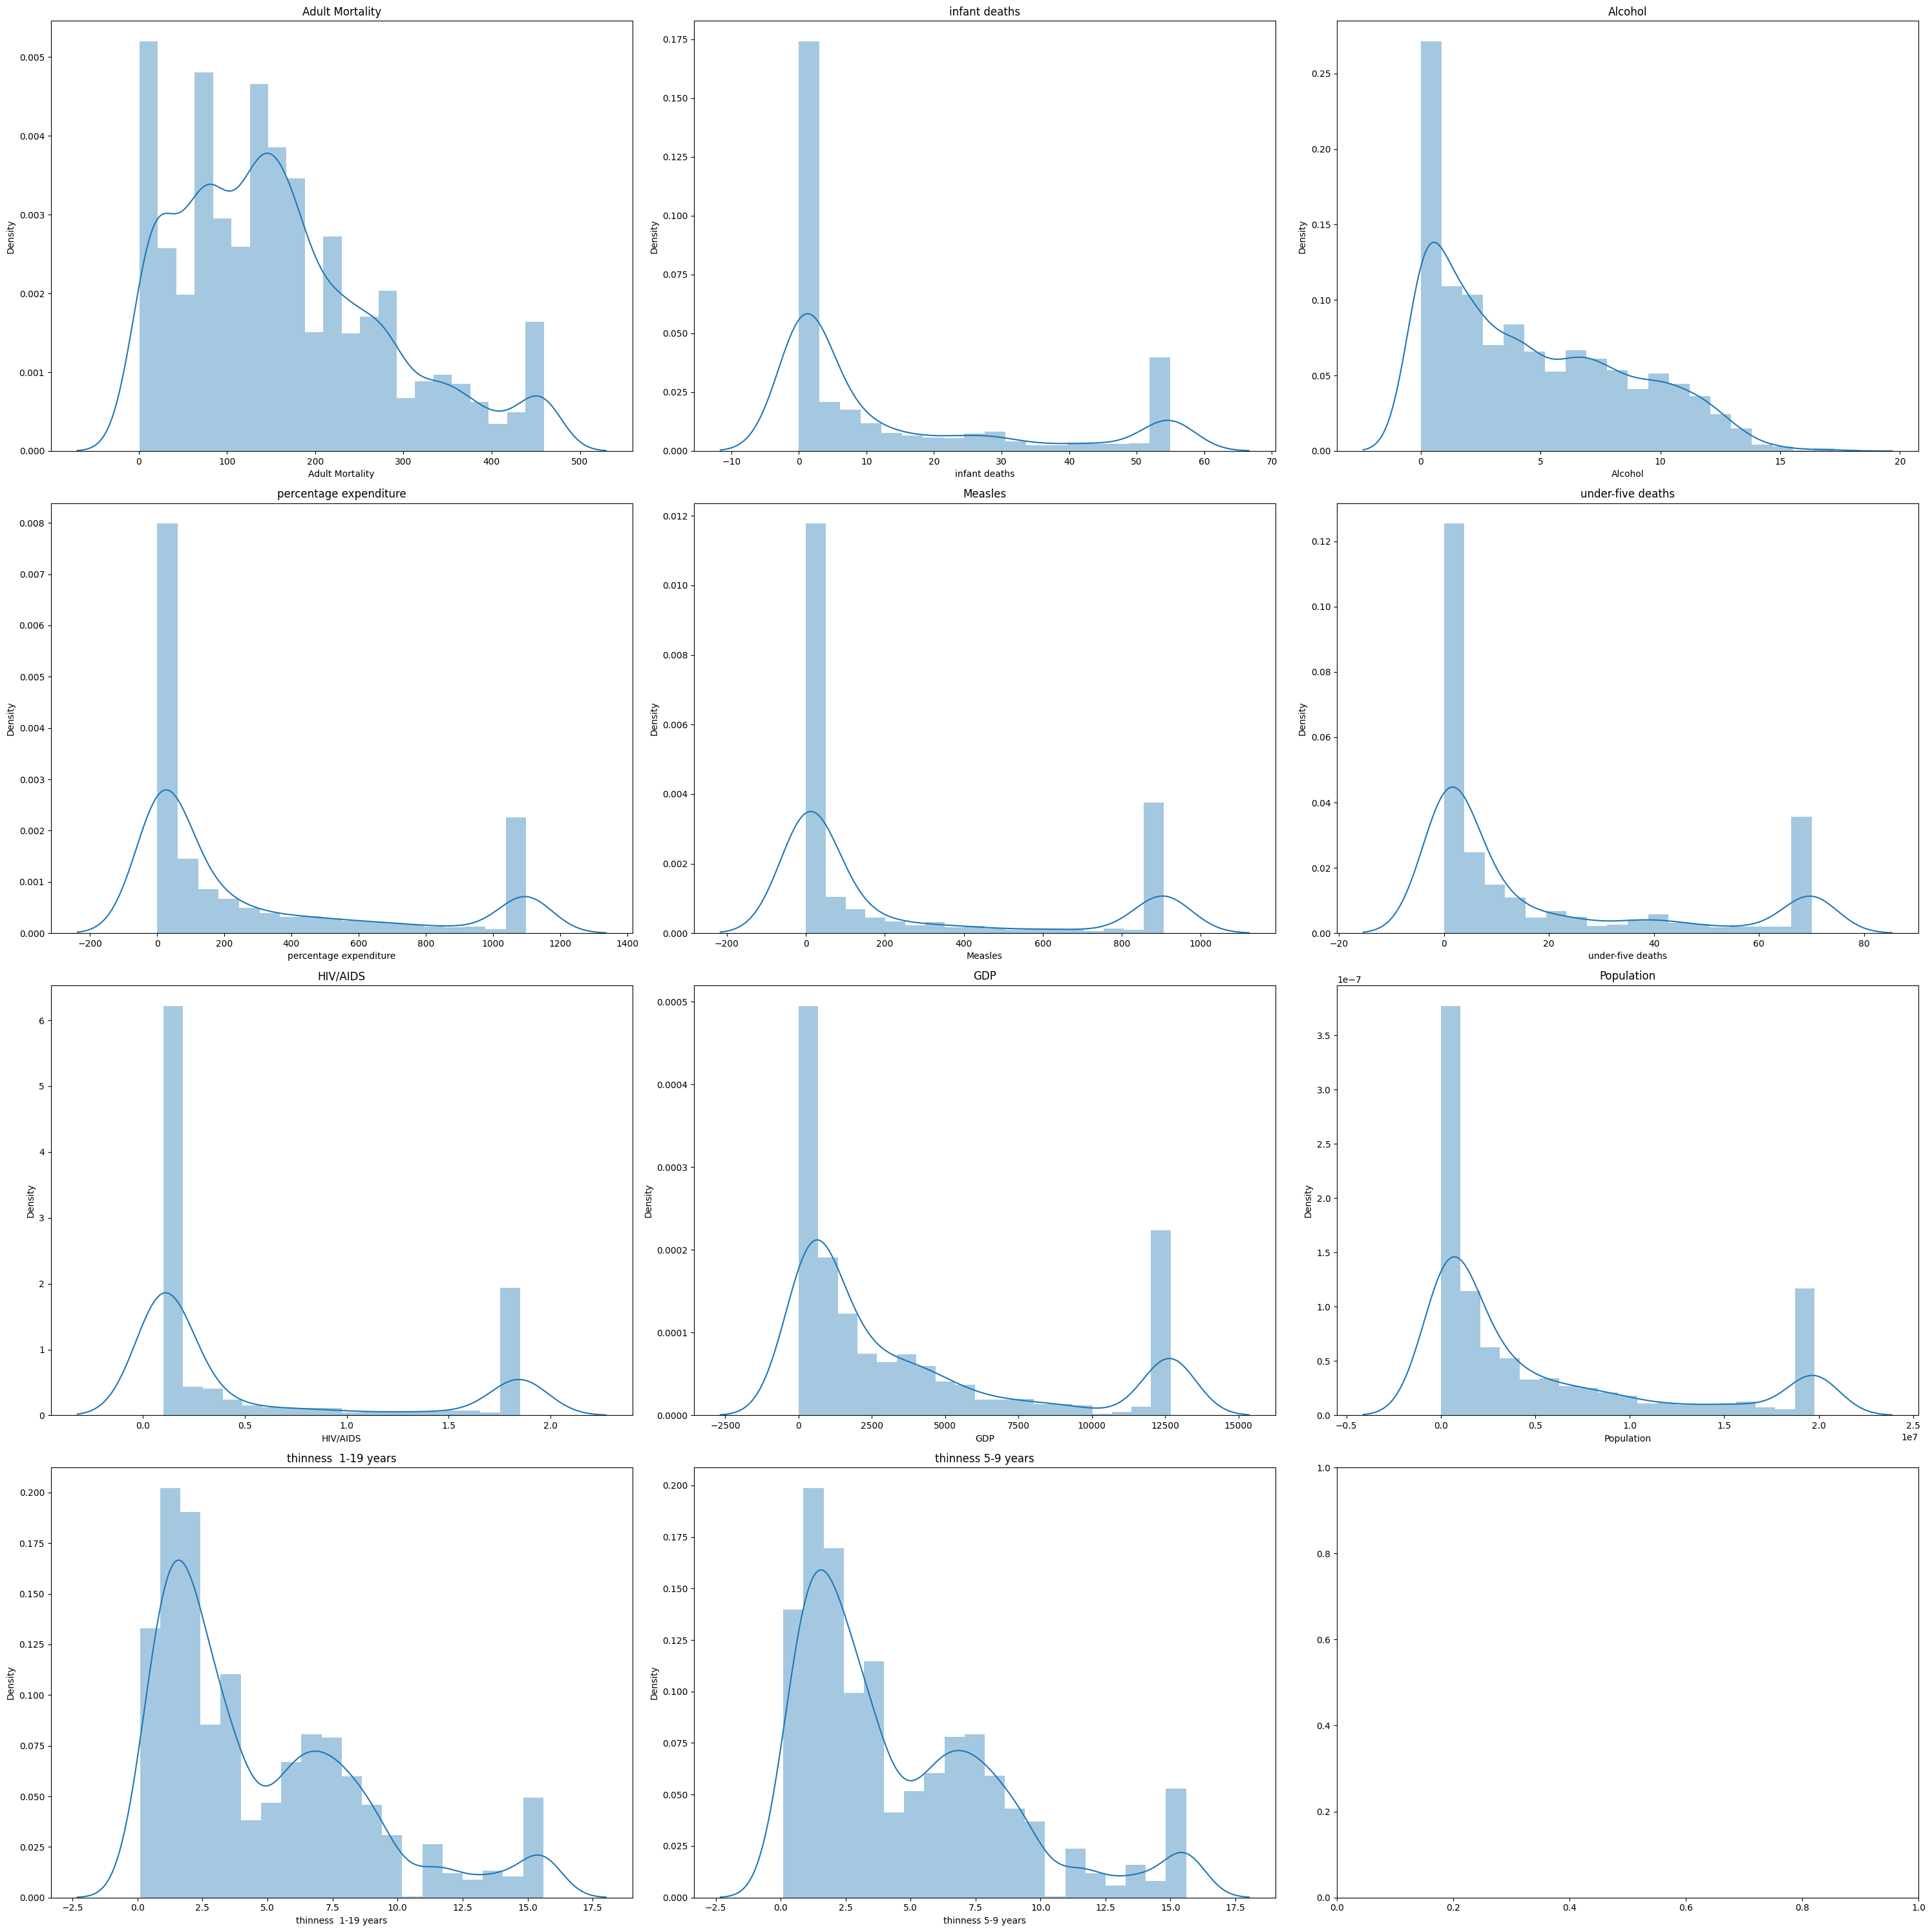

In [53]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(30,30))
index=0
ax=ax.flatten()


for col,value in cleaned_data_temp[columns_to_transform].items():
    if index >= 12:
        break
    sns.distplot(value,ax=ax[index])
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

In [54]:
log_transformed_data = cleaned_data_temp.copy()

log_transformed_data = log_transformation(log_transformed_data,columns_to_transform)

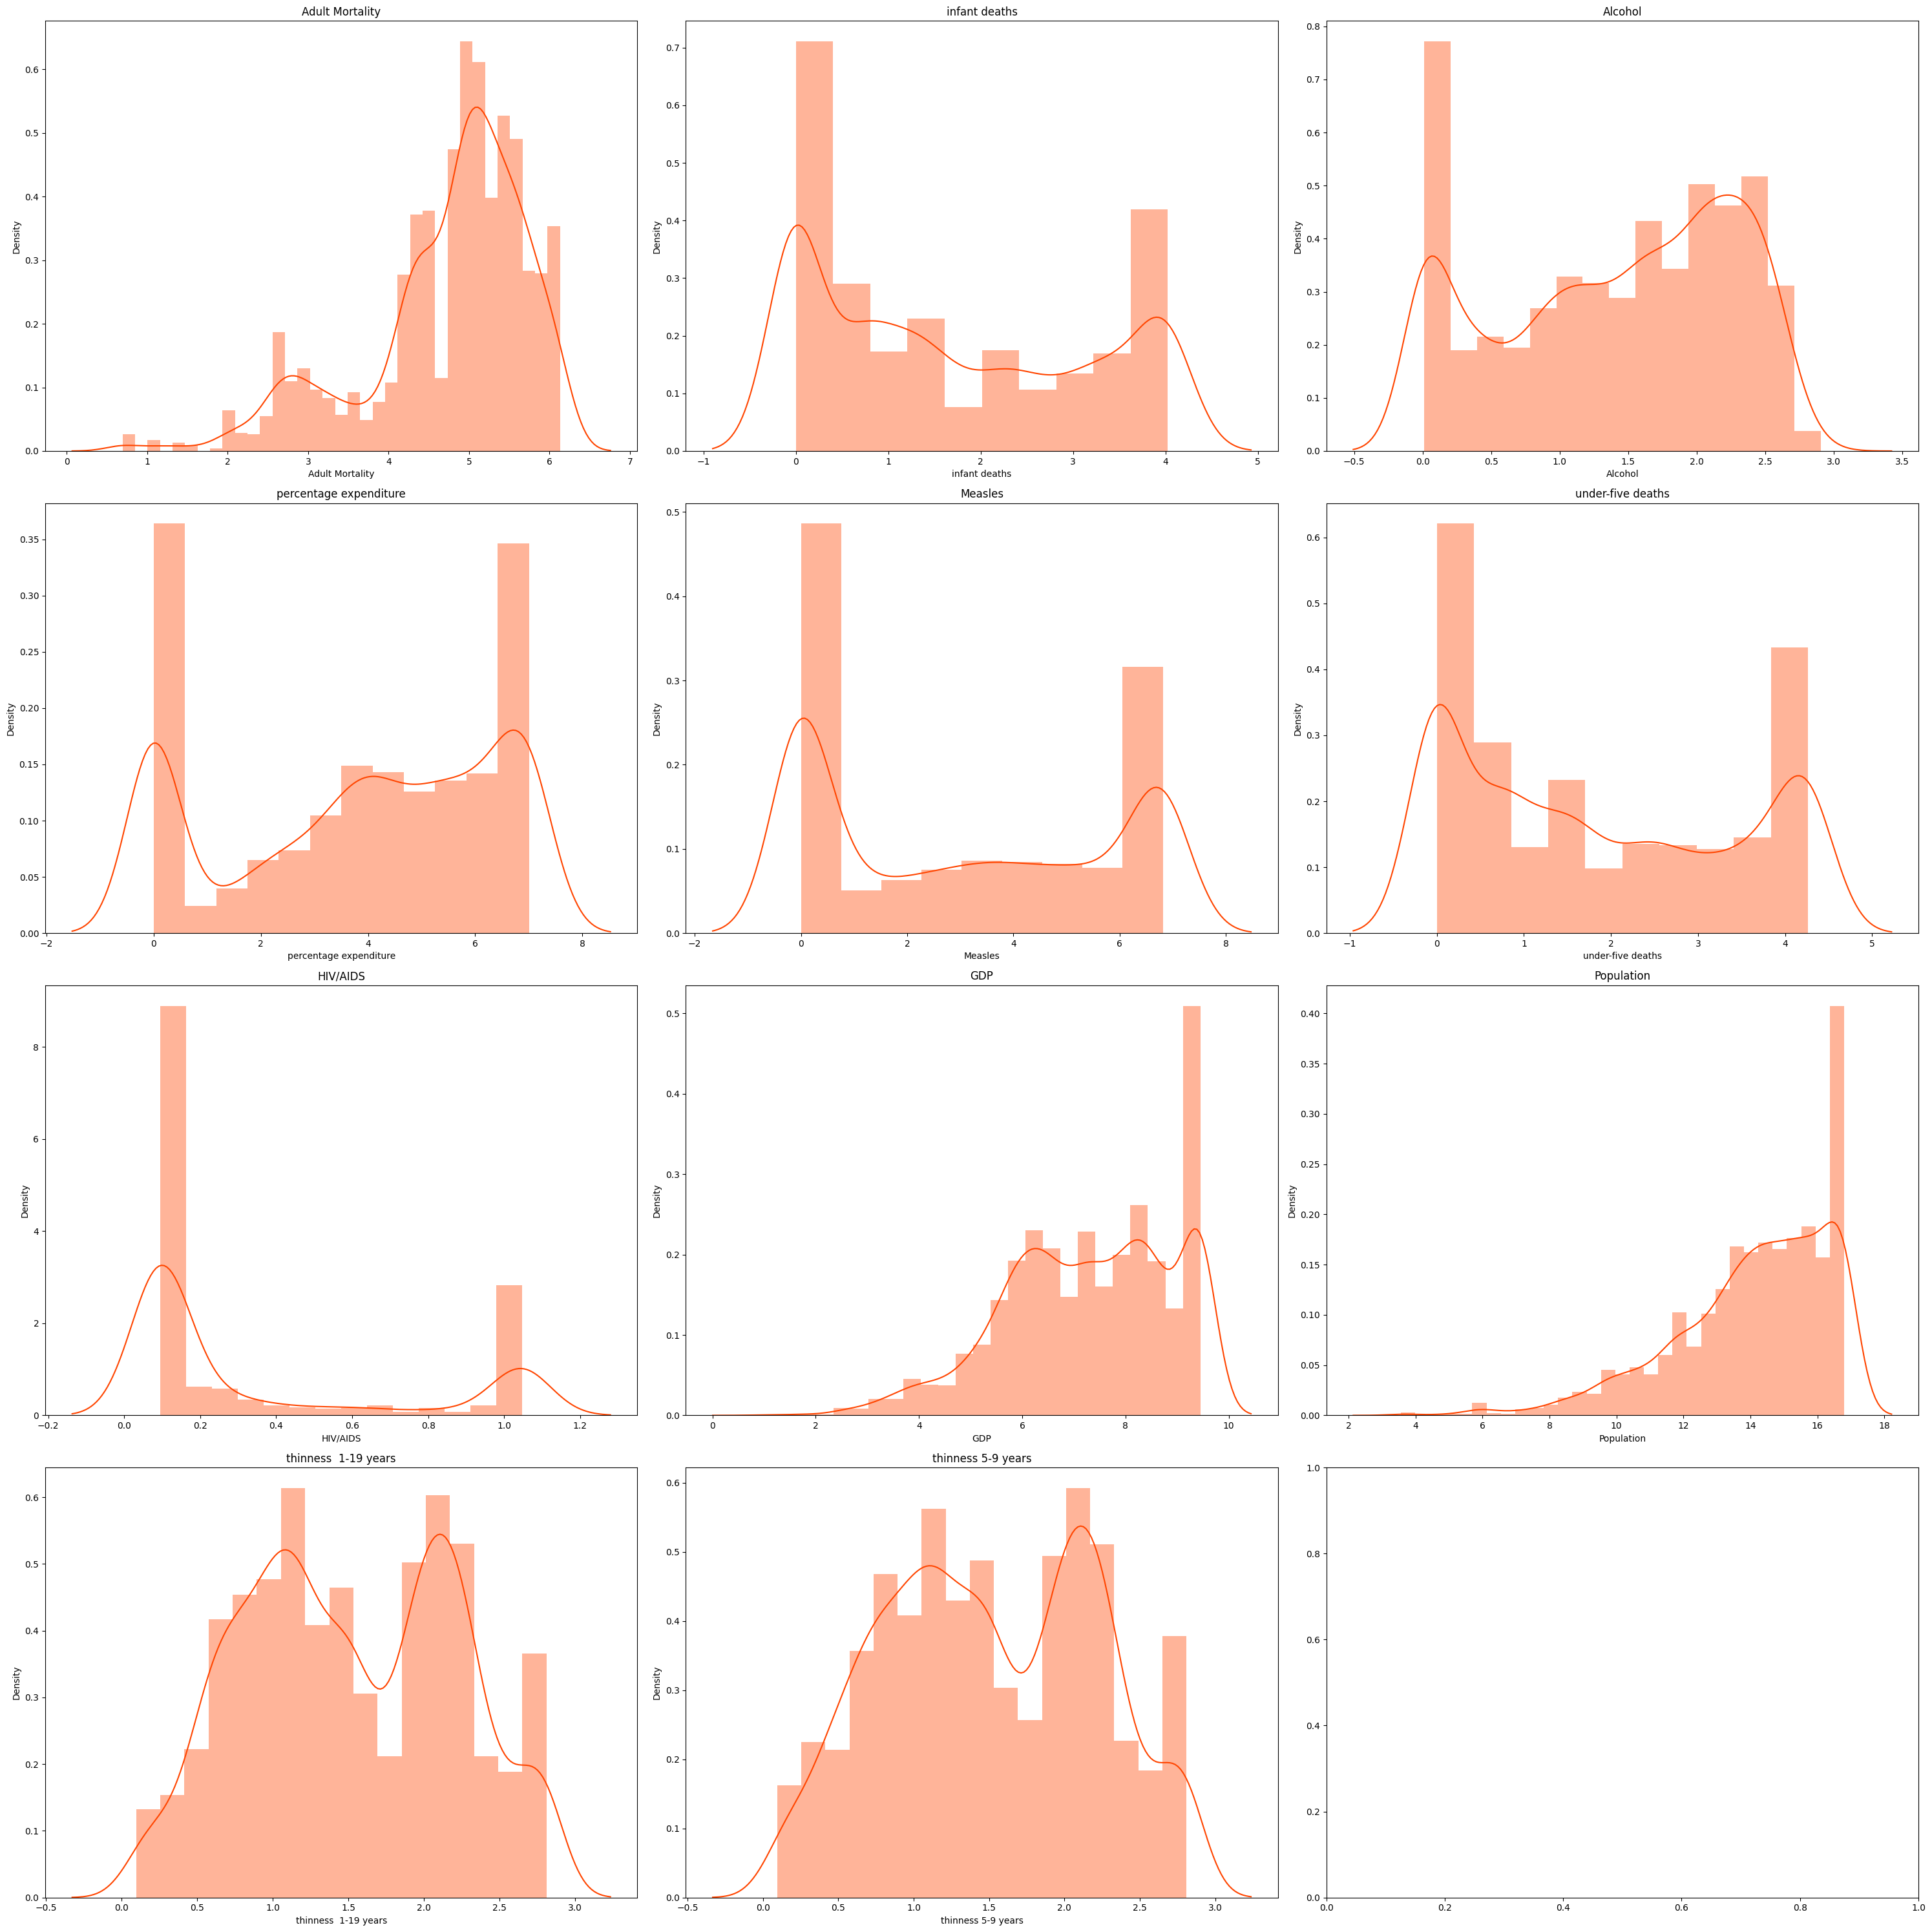

In [55]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(30,30))
index=0
ax=ax.flatten()


for col,value in log_transformed_data[columns_to_transform].items():
    if index >= 12:
        break
    sns.distplot(value,ax=ax[index], color='orangered')
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

It is ideal to transform the data. As we can see after applying log transform most of the columns turn to Normally Distributed except Population and Adult Mortality... But still the skewness in these two columns are managebale as they were the right skewed of same proportion before and now they are left skewed. We'll still check the other transformations on these columns to compare the Distribution.

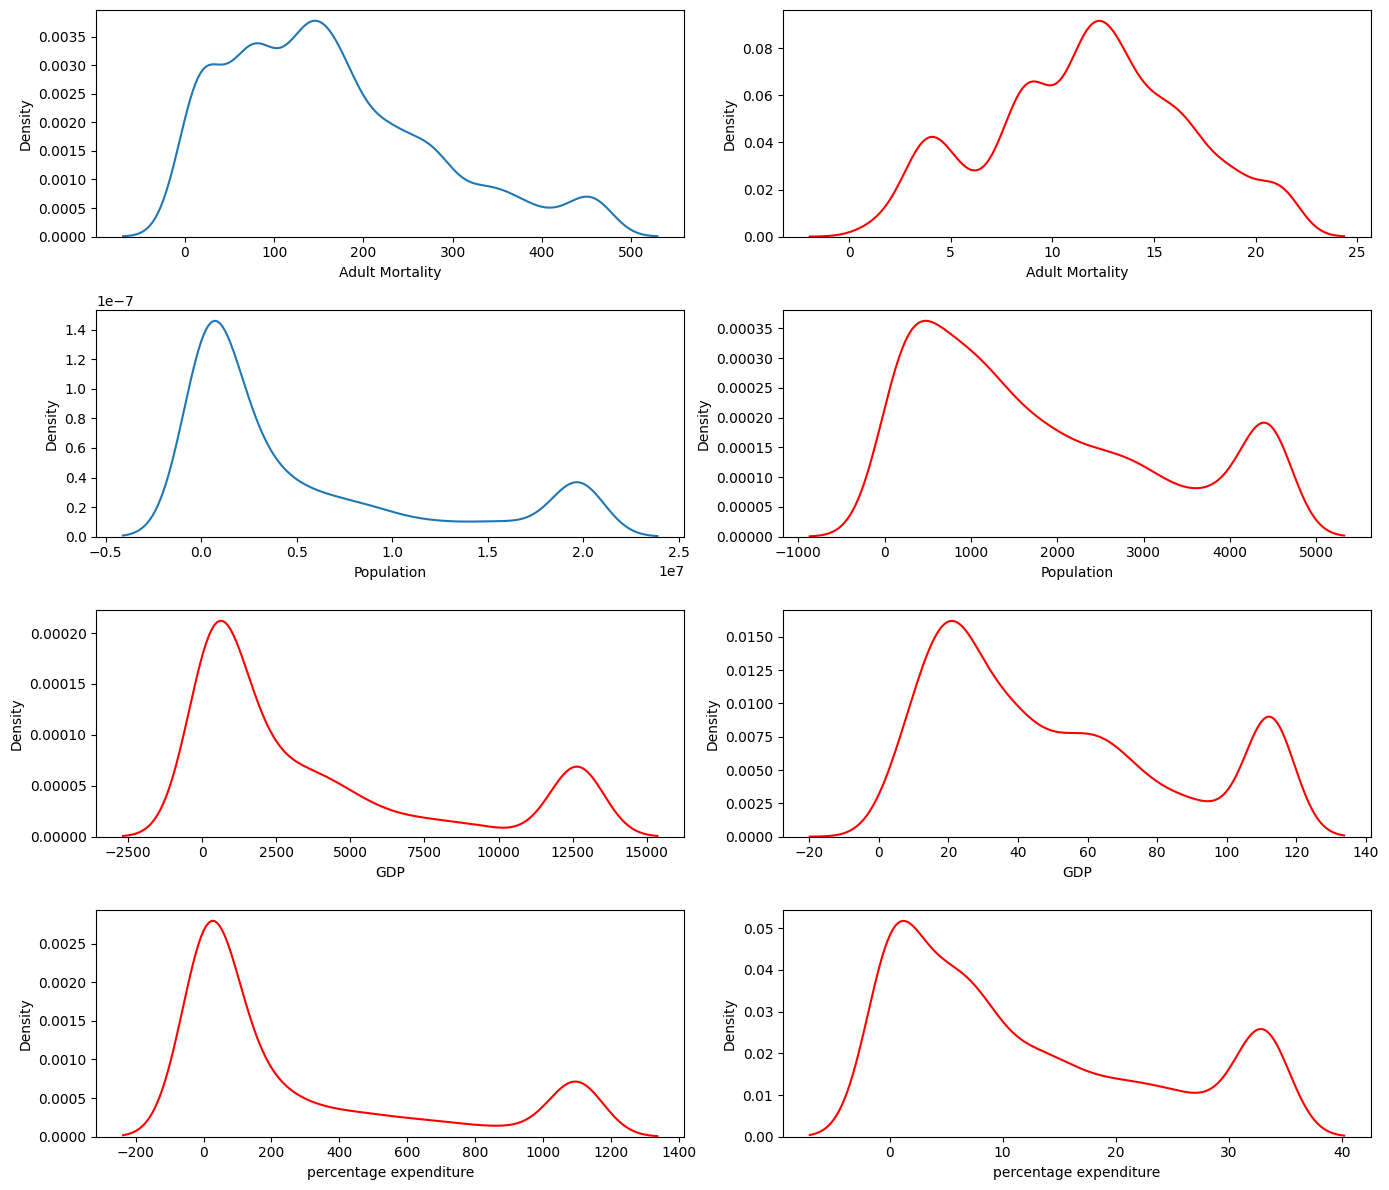

In [56]:
plt.figure(figsize=(14,12))

plt.subplot(4,2,1)
sns.kdeplot(cleaned_data_temp['Adult Mortality'])
plt.subplot(4,2,2)
sns.kdeplot(np.sqrt(cleaned_data_temp['Adult Mortality']),color='red')

plt.subplot(4,2,3)
sns.kdeplot(cleaned_data_temp["Population"])

plt.subplot(4,2,4)
sns.kdeplot(np.sqrt(cleaned_data_temp['Population']),color='red')

plt.subplot(4,2,5)
sns.kdeplot((cleaned_data_temp['GDP']),color='red')

plt.subplot(4,2,6)
sns.kdeplot(np.sqrt(cleaned_data_temp['GDP']),color='red')

plt.subplot(4,2,7)
sns.kdeplot((cleaned_data_temp['percentage expenditure']),color='red')

plt.subplot(4,2,8)
sns.kdeplot(np.sqrt(cleaned_data_temp['percentage expenditure']),color='red')
plt.tight_layout()

sqrt transformation works fine in case of the Population, Adult Mortality columns, GDP and Percentage Expenditure columns


In [57]:
log_transform_cols = cleaned_data_temp[columns_to_transform].drop(columns=['percentage expenditure','Adult Mortality','GDP', 'Population']).columns
sqrt_transform_cols = cleaned_data_temp[['percentage expenditure','Adult Mortality','GDP', 'Population']].columns


In [58]:
log_transform_cols

Index(['infant deaths', 'Alcohol', 'Measles', 'under-five deaths', 'HIV/AIDS',
       'thinness  1-19 years', 'thinness 5-9 years'],
      dtype='object')

In [59]:
sqrt_transform_cols

Index(['percentage expenditure', 'Adult Mortality', 'GDP', 'Population'], dtype='object')

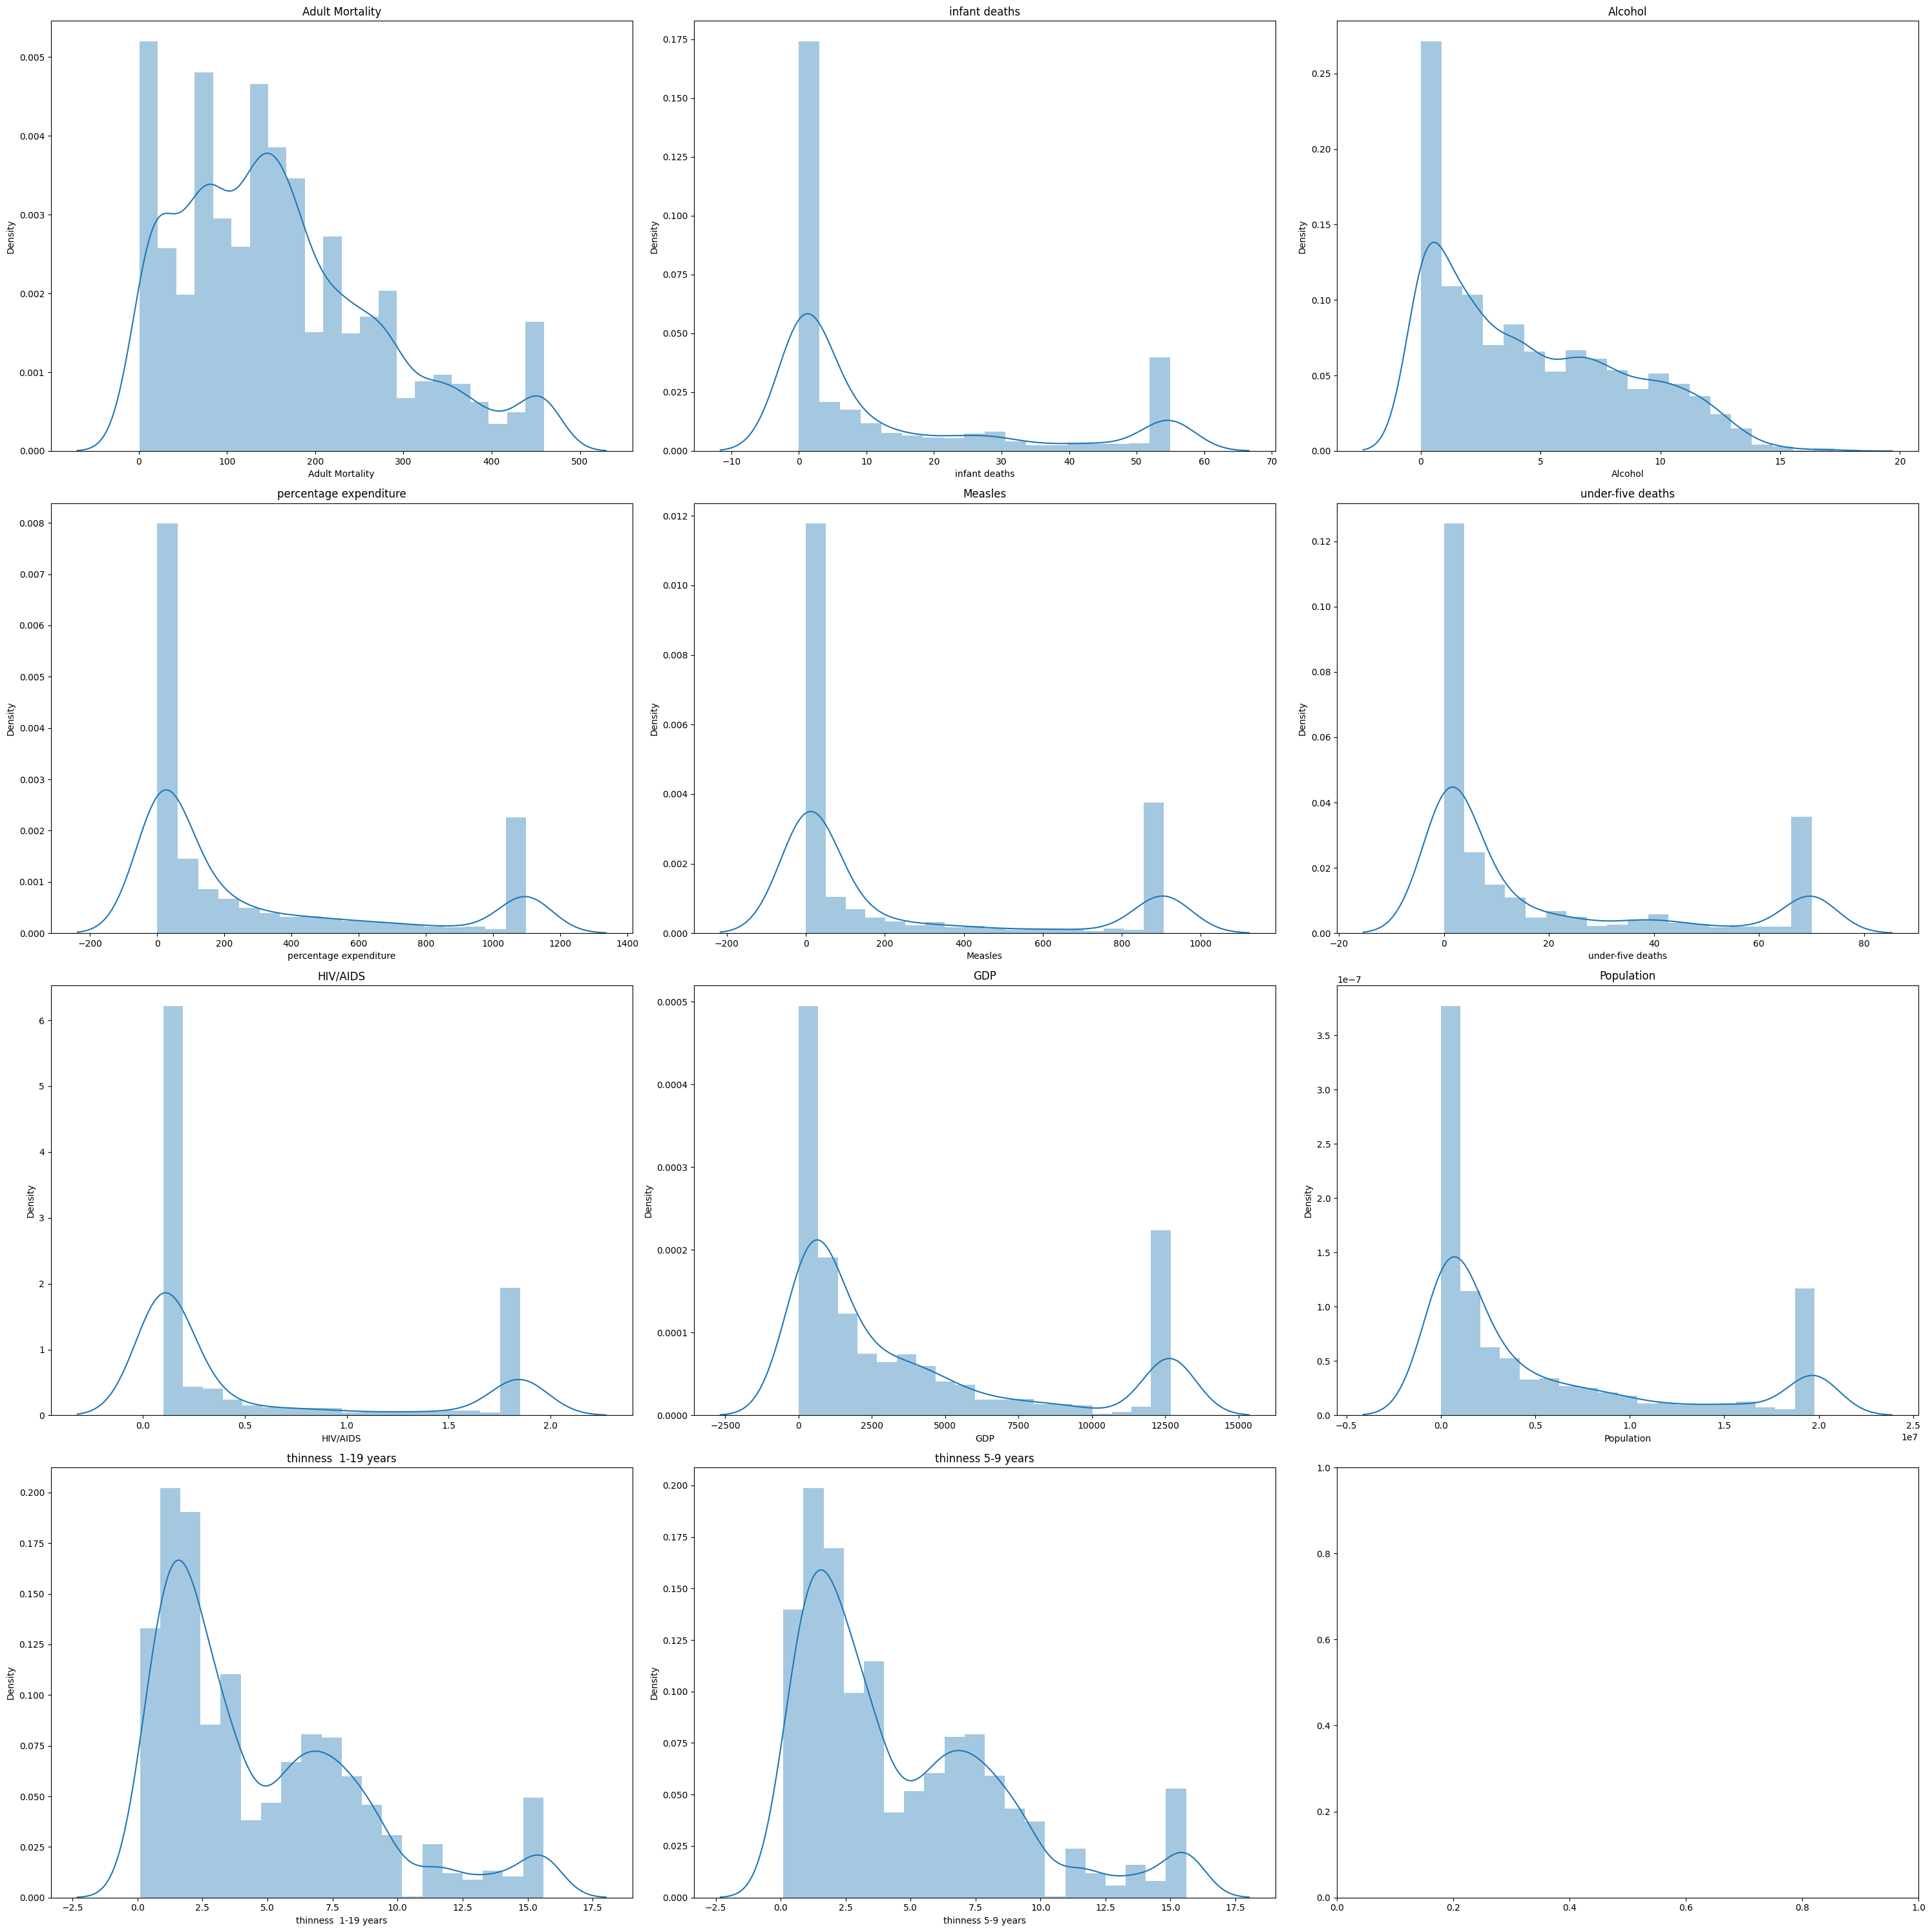

In [60]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(30,30))
index=0
ax=ax.flatten()


for col,value in cleaned_data_temp[columns_to_transform].items():
    if index >= 12:
        break
    sns.distplot(value,ax=ax[index])
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

In [61]:
def log_transformation(data,col):
    data[col] = np.log1p(data[col])
    return data

def sqrt_transformation(data,col):
    data[col] = np.sqrt(data[col])
    return data

In [62]:
cleaned_data_temp[log_transform_cols] = log_transformation(cleaned_data_temp[log_transform_cols],log_transform_cols)

cleaned_data_temp[sqrt_transform_cols] = sqrt_transformation(cleaned_data_temp[sqrt_transform_cols],sqrt_transform_cols)

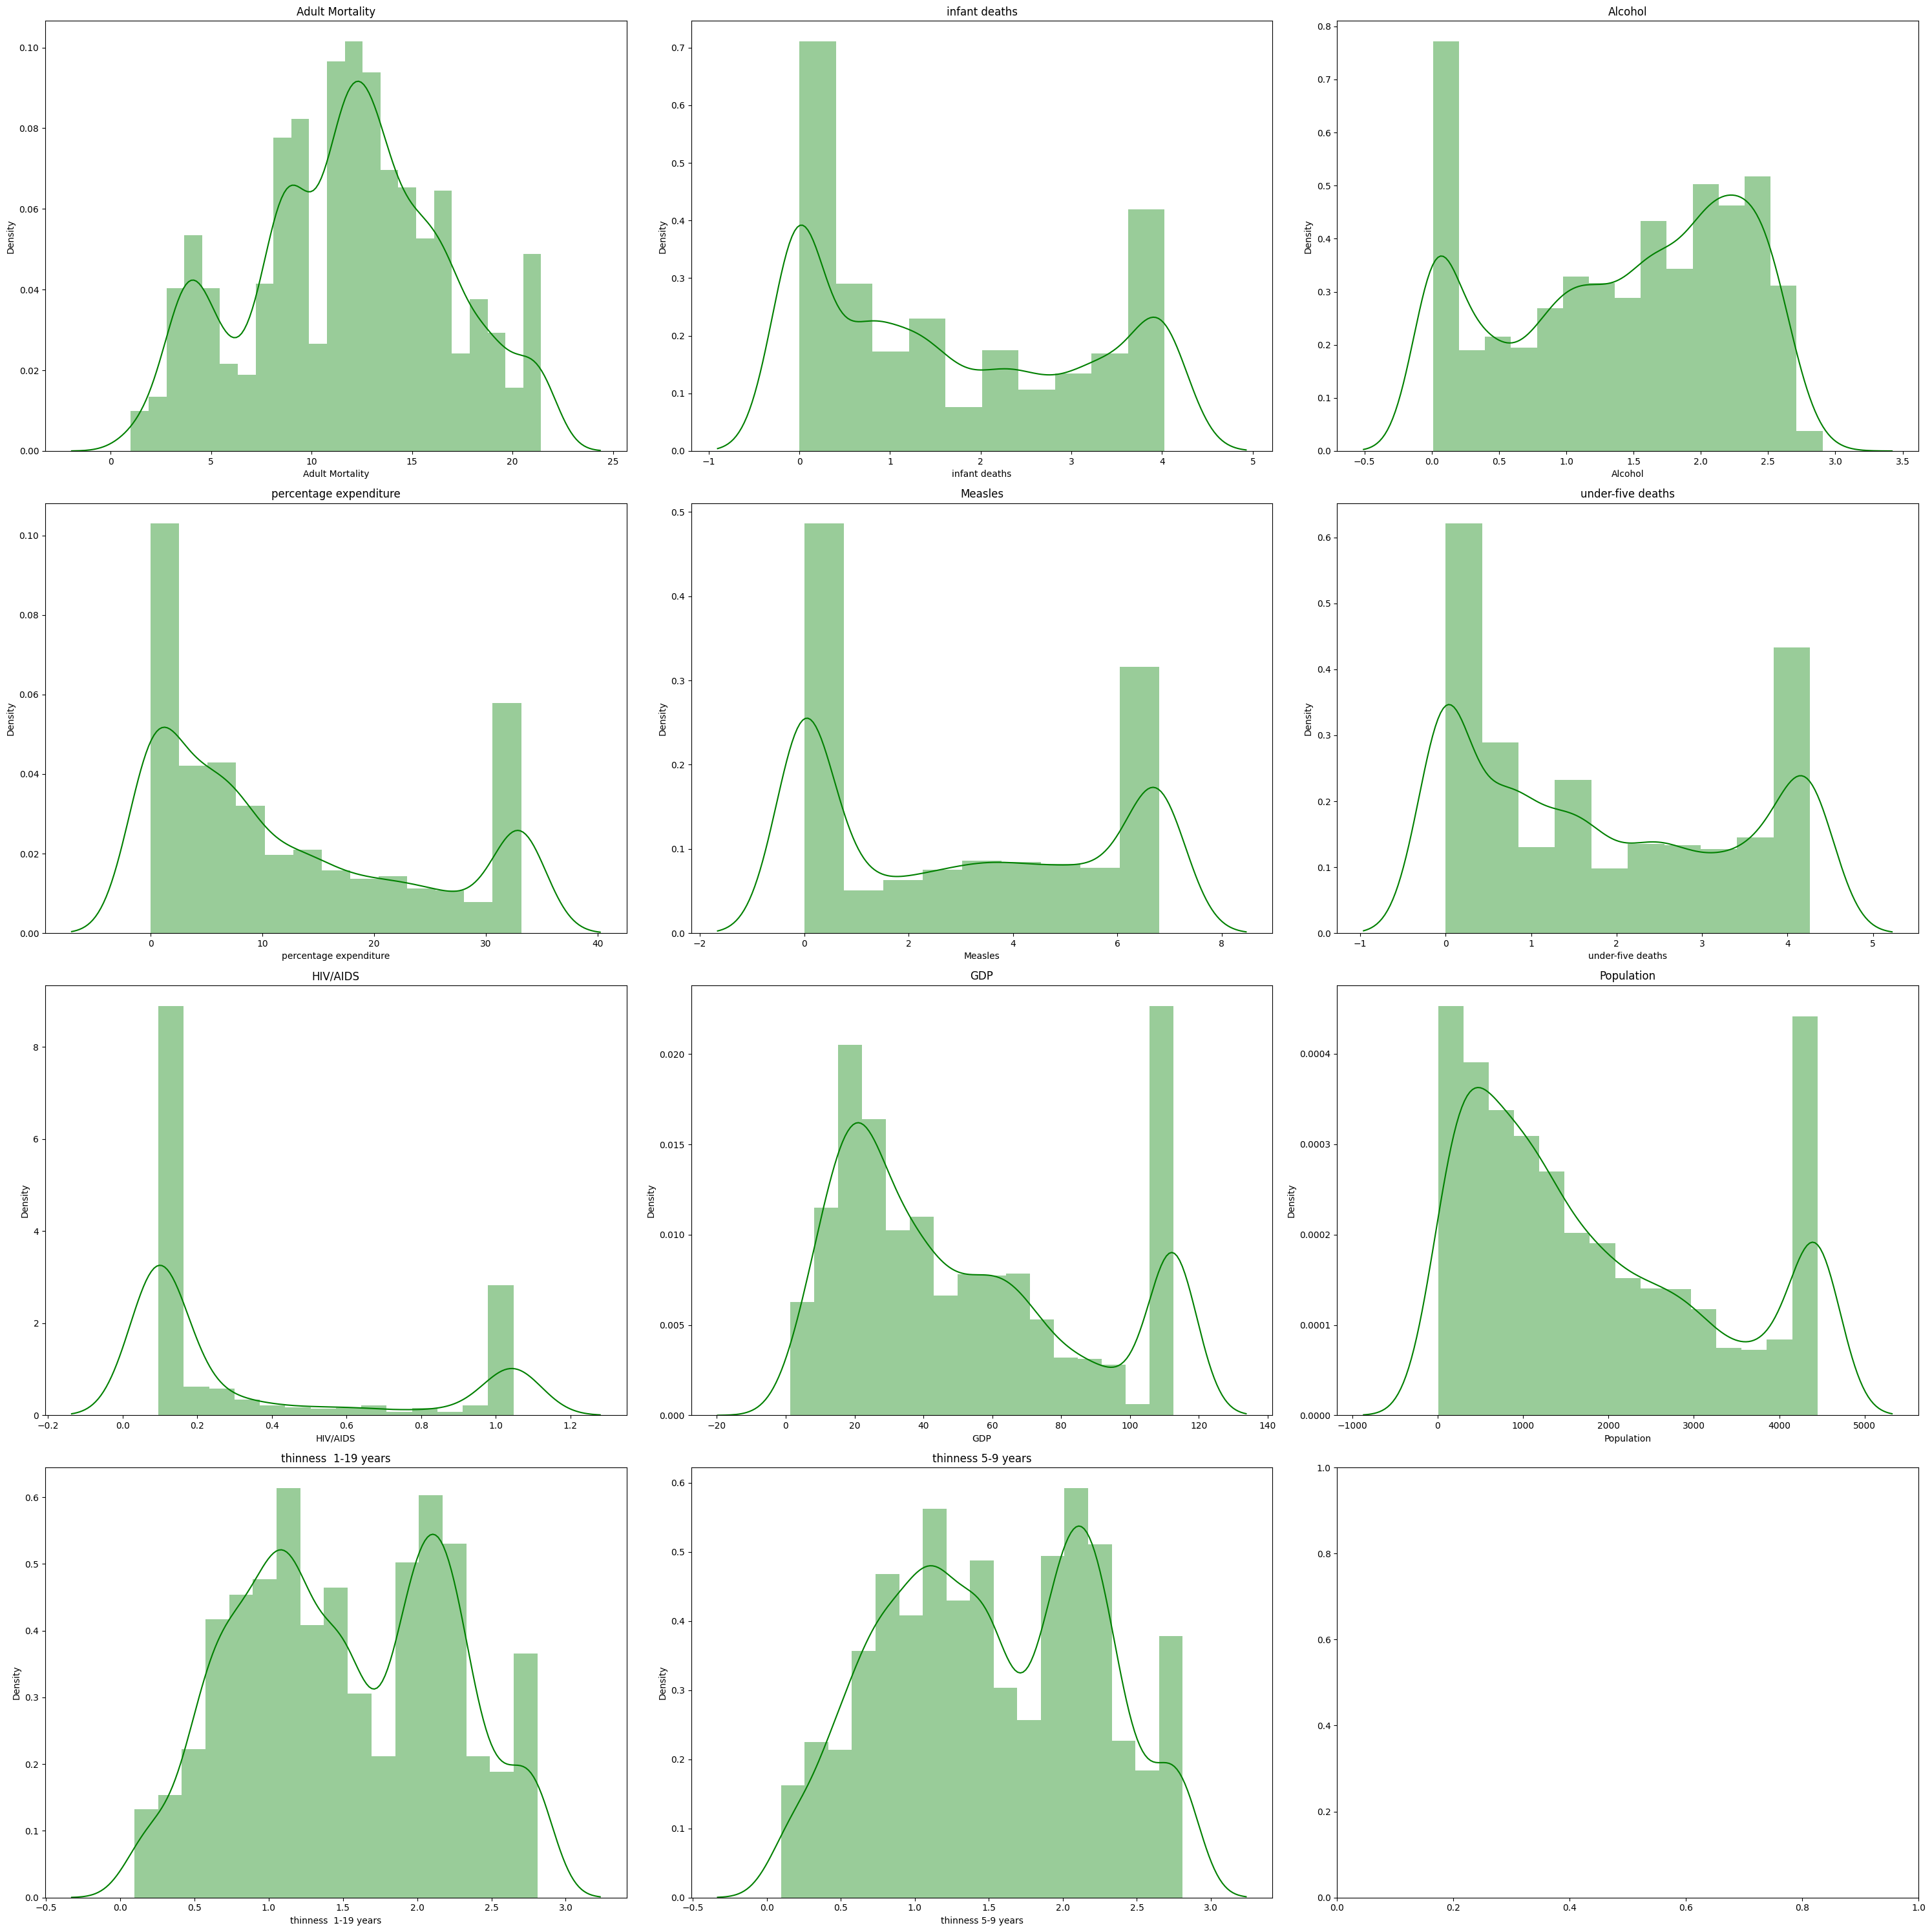

In [65]:
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(30,30))
index=0
ax=ax.flatten()


for col,value in cleaned_data_temp[columns_to_transform].items():
    if index >= 12:
        break
    sns.distplot(value,ax=ax[index], color='green')
    ax[index].set_title(col)
    index+=1
    
plt.tight_layout()

Data is transformed perfectly...

In [92]:
print(cleaned_data_temp[['Country']].value_counts())

print("\n\n",cleaned_data_temp['Country'].nunique())

print("\n\n",cleaned_data_temp['Country'].unique())

Country    
Afghanistan    16
New Zealand    16
Niger          16
Nigeria        16
Norway         16
               ..
Ghana          16
Greece         16
Grenada        16
Guatemala      16
Zimbabwe       16
Name: count, Length: 183, dtype: int64


 183


 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eth

In [104]:
print(cleaned_data_temp[['Country']].value_counts())



print("\n\n",cleaned_data_temp['Country'].unique())

Country    
Afghanistan    16
New Zealand    16
Niger          16
Nigeria        16
Norway         16
               ..
Ghana          16
Greece         16
Grenada        16
Guatemala      16
Zimbabwe       16
Name: count, Length: 183, dtype: int64


 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 

In [114]:
print(cleaned_data_temp['Country'].value_counts().describe())

count    183.0
mean      16.0
std        0.0
min       16.0
25%       16.0
50%       16.0
75%       16.0
max       16.0
Name: count, dtype: float64


As the Country contains 183 entries and each country has 16 values, it will create a lot of input features after encoding (OneHotEncoding), and we cannot replace less occuring countries with "_Other_" in this case as well. The only option left is to do Encoding or Drop the column entirely. But the Country column might be useful. So, we will use OneHotEncoding on the Country column and then perform PCA on the data... to do Dimentionality Reduction...

In [115]:
cleaned_data_temp['Status'].value_counts()

Status
Developing    2416
Developed      512
Name: count, dtype: int64

for Status column, we will perform Ordinal Encoding, giving Developed Conutry more previledge then the Developing country

Dveloped -> 1         |         Developing -> 0

**Checking Corelation**

In [120]:
cleaned_data_temp.corr(numeric_only= True)['Life expectancy']

Year                               0.170033
Adult Mortality                   -0.597303
infant deaths                     -0.614763
Alcohol                            0.363596
percentage expenditure             0.465256
Hepatitis B                        0.376375
Measles                           -0.311709
BMI                                0.563092
under-five deaths                 -0.636994
Polio                              0.568099
Total expenditure                  0.229379
Diphtheria                         0.573115
HIV/AIDS                          -0.801367
GDP                                0.579075
Population                        -0.075226
thinness  1-19 years              -0.562090
thinness 5-9 years                -0.566937
Income composition of resources    0.743308
Schooling                          0.766588
Life expectancy                    1.000000
Name: Life expectancy, dtype: float64

<Axes: >

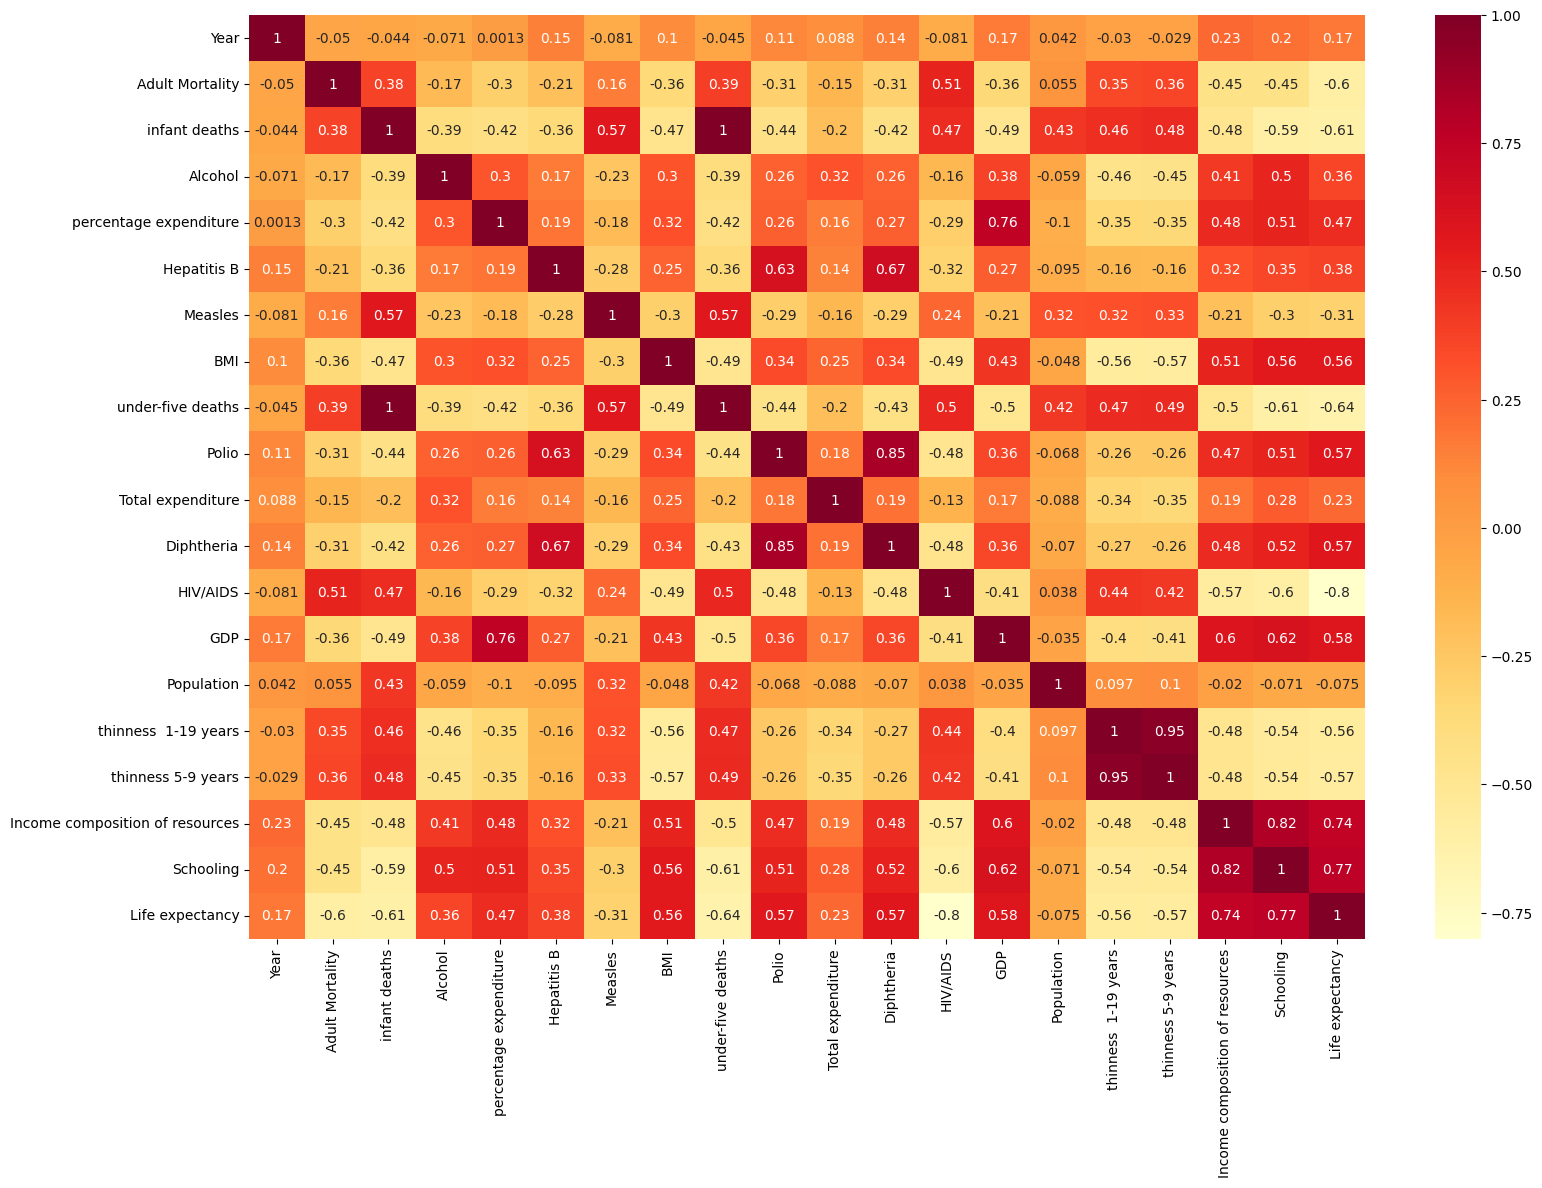

In [119]:
plt.figure(figsize=(18,12))

sns.heatmap(cleaned_data_temp.corr(numeric_only= True),annot=True,cmap='YlOrRd')

**Drop Threshhold  ( > 0.75 )**


- Income Composition of Resources - Schooling  ->  0.82  , Life expectancy ->   ICOR[0.74]  , S[0.77]  


[Income Composition of Resources] ->  Drop


- Dephtheria - Polio  ->  0.85  , Life expectancy ->   D[0.57]  , P[0.77]  

{Similar Corealaion with ecery other column -> Same columns}

[Dephtheria] ->  Drop  


- GDP - Percentage Expenditure  ->  0.76  , Life expectancy ->   G[0.58]  , P[0.47]  



[Percentage Expdenditure] ->  Drop  


In [124]:
cleaned_data_temp.drop(columns=['Income composition of resources','Diphtheria','percentage expenditure'], inplace=True)

In [126]:
cleaned_data_temp.sample(4)

Year  Adult Mortality  infant deaths   Alcohol  Hepatitis B   Measles  \
2701  2011.0        14.730920       2.079442  1.266948         97.0  0.000000   
127   2000.0         8.831761       0.693147  2.413232         97.8  4.691348   
531   2012.0        19.157244       3.850148  0.482426         45.0  4.795791   
1491  2014.0        18.138357       2.197225  0.009950         45.0  3.555348   

       BMI  under-five deaths  Polio  Total expenditure  HIV/AIDS        GDP  \
2701  45.0           2.197225   97.0               1.98  0.095310  75.166339   
127   58.2           1.098612   49.5               8.80  0.095310  46.582411   
531   17.9           4.262680   51.0               3.00  1.047319  31.200522   
1491  26.7           2.484907   49.5               1.40  0.641854  21.411800   

       Population  thinness  1-19 years  thinness 5-9 years  Schooling  \
2701   719.347621              1.435085            1.458615       10.6   
127    138.394364              0.530628            0.530628       20.4   
531   1129.218756              2.302585            2.292535        7.3   
1491   663.126685              2.041220            2.014903        9.9   

           Country      Status  Life expectancy  
2701  Turkmenistan  Developing             65.6  
127      Australia   Developed             79.5  
531           Chad  Developing             51.8  
1491       Liberia  Developing             58.1

## Model Building



In [137]:
cleaned_data_temp.head(3)

Year  Adult Mortality  infant deaths  Alcohol  Hepatitis B   Measles  \
0  2015.0        16.217275       4.025352  0.00995         65.0  6.809729   
1  2014.0        16.462078       4.025352  0.00995         62.0  6.200509   
2  2013.0        16.370706       4.025352  0.00995         64.0  6.066108   

    BMI  under-five deaths  Polio  Total expenditure  HIV/AIDS        GDP  \
0  19.1            4.26268   49.5               8.16   0.09531  24.171454   
1  18.6            4.26268   58.0               8.18   0.09531  24.752707   
2  18.1            4.26268   62.0               8.13   0.09531  25.134538   

    Population  thinness  1-19 years  thinness 5-9 years  Schooling  \
0  4448.135972              2.809403            2.809403       10.1   
1   572.347796              2.809403            2.809403       10.0   
2  4448.135972              2.809403            2.809403        9.9   

       Country      Status  Life expectancy  
0  Afghanistan  Developing             65.0  
1  Afghanistan  Developing             59.9  
2  Afghanistan  Developing             59.9

In [145]:
X = cleaned_data_temp.drop('Life expectancy', axis = 1)

y = cleaned_data_temp['Life expectancy']



In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)


X_train.shape, X_test.shape, y_train.shape, y_test.shape



((2342, 18), (586, 18), (2342,), (586,))

In [155]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

ord_enc = OrdinalEncoder(categories=[['Developing','Developed']])
oh_enc = OneHotEncoder(drop='first', sparse_output=False, dtype='int32')
scaler = StandardScaler()


scale_cols = X.select_dtypes(include='number').columns



In [156]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[
    ('ordinal', ord_enc, ['Status']),
    ('onehot', oh_enc, ['Country']),
    ('scaler', scaler, scale_cols)
])

In [169]:
y_pred.shape

(586,)

In [194]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

model = Pipeline(steps = [
    ('prep', preprocessing),
    ('lr', LinearRegression())
])


model.fit(X_train,y_train)

y_pred = model.predict(X_test)

y_pred_train = model.predict(X_train)


cv = cross_val_score(model, X, y, cv = 20, scoring = 'r2')


print("\n\nTraining Data Accuracy Score: ", r2_score(y_train,y_pred_train))
      
print("\n\nTesting Data Accuracy Score: ", r2_score(y_test,y_pred), " and Cross val score = ", cv.mean())




Training Data Accuracy Score:  0.9586558993967907


Testing Data Accuracy Score:  0.9460623807312936  and Cross val score =  nan


**No Overfitting Issue. Perfect Generalised Model... without HyperParameter Tuning**

Cross Validation is giving nan values. It may be because output variable contains lot of similar values...

In [198]:
print(y.value_counts().sort_values(ascending=True))

Life expectancy
45.4     1
83.2     1
43.8     1
82.9     1
83.4     1
        ..
73.9    25
73.6    28
78.0    31
75.0    33
73.0    45
Name: count, Length: 362, dtype: int64


Contains a lot of '1' values in a Dataset.

In [189]:
#    ----------------      Manual Cross Validation Score     -----------------


from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Initialize model

# Create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
r2_scores = []

# Perform manual cross-validation
for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Check for constant target in this fold
    if y_train_fold.nunique() == 1 or y_test_fold.nunique() == 1:
        print("⚠️ Constant target value in one of the folds, skipping.")
        r2_scores.append(np.nan)
        continue

    # Fit the model
    model.fit(X_train_fold, y_train_fold)
    
    # Predict and evaluate
    y_pred_fold = model.predict(X_test_fold)
    score = r2_score(y_test_fold, y_pred_fold)
    r2_scores.append(score)

# Convert to numpy array
r2_scores = np.array(r2_scores)

# Display results
print("\nR2 scores from each fold:", r2_scores)
print("Average R2 (ignoring NaNs):", np.nanmean(r2_scores))


R2 scores from each fold: [0.94937624 0.94874363 0.94409986 0.95540894 0.95402604]
Average R2 (ignoring NaNs): 0.9503309436712144
